In [295]:
# Import necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


In [296]:

# Load the JSON file
file_path = 'L+MFinal.json'  # Update with your file path if needed
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Convert JSON data into a DataFrame
programs = pd.json_normalize(data)

# Descriptive Statistics
print("Summary of Numerical Data:")
print(programs[['Credits', 'Duration']].describe())


Summary of Numerical Data:
         Credits     Duration
count         11           11
unique         2            3
top     120 ECTS  4 semesters
freq           6            6


In [297]:

# Explode list-type columns for detailed analysis
Skills = programs.explode('Skills')[['Title', 'Skills']]
Careers = programs.explode('Careers')[['Title', 'Careers']]
Sectors = programs.explode('Sectors')[['Title', 'Sectors']]
Subjects = programs.explode('Subjects')[['Title', 'Subjects']]


# Unique Values Count
print("\nUnique Value Counts:")
print(f"- Unique Competencies: {Skills['Skills'].nunique()}")
print(f"- Unique Careers: {Careers['Careers'].nunique()}")
print(f"- Unique Sectors: {Sectors['Sectors'].nunique()}")
print(f"- Unique Subjects: {Subjects['Subjects'].nunique()}")



Unique Value Counts:
- Unique Competencies: 59
- Unique Careers: 74
- Unique Sectors: 18
- Unique Subjects: 288


In [298]:

# Most Common Items in Each Category
most_common_competencies = Skills['Skills'].value_counts().head(5)
most_common_Careers = Careers['Careers'].value_counts().head(5)
most_common_Sectors = Sectors['Sectors'].value_counts().head(5)
most_common_Subjects = Subjects['Subjects'].value_counts().head(5)

print("\nMost Common Items:\n\n")
print("- Skills: \n")
print(most_common_competencies)
print("\n- Careers: \n")
print(most_common_Careers)
print("\n- Sectors:\n")
print(most_common_Sectors)
print("\n- Subjects:\n")
print(most_common_Subjects)



Most Common Items:


- Skills: 

Skills
Mastery of the techniques for developing accounting communication supports.                                    1
Manage technology-intensive projects and ensure the economic, social and societal performance of companies.    1
Analyze and design the overall fiscal and social finance operations of an organization.                        1
Define and implement a manual of accounting procedures and internal control.                                   1
Manage and supervise audit assignments.                                                                        1
Name: count, dtype: int64

- Careers: 

Careers
Business Analyst         3
Management Controller    2
BI Consultant            2
Data Analyst             2
Financial Analyst        2
Name: count, dtype: int64

- Sectors:

Sectors
Banks, Insurance, Stocks & Leasing    11
IT/Digital services companies          7
Commercial or Industrial Companies     6
Consulting Firms                       4


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\2722671823.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_distribution.index, y=level_distribution.values, palette="viridis")


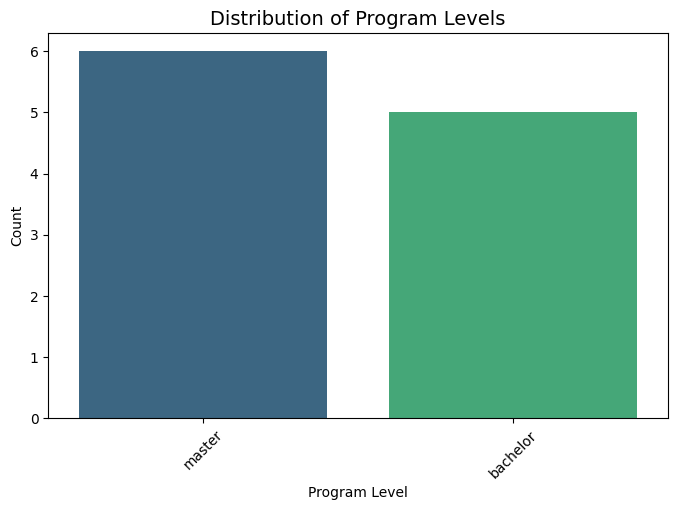

In [299]:

# Visualizing Program Levels
programs['Degree'] = programs['Degree'].str.lower().str.replace('professionnel', 'professionnel')
level_distribution = programs['Degree'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=level_distribution.index, y=level_distribution.values, palette="viridis")
plt.title('Distribution of Program Levels', fontsize=14)
plt.ylabel('Count')
plt.xlabel('Program Level')
plt.xticks(rotation=45)
plt.show()


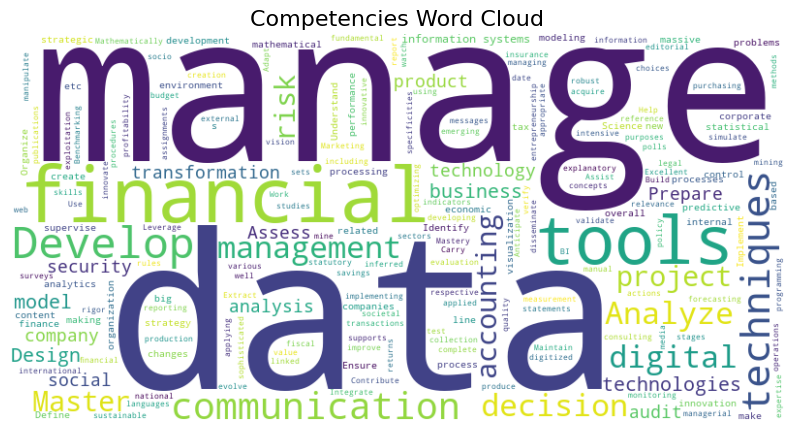

In [300]:

# Competencies Word Cloud
competencies_text = ' '.join(Skills['Skills'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(competencies_text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Competencies Word Cloud', fontsize=16)
plt.show()


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\515817860.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_Careers.index, x=top_Careers.values, palette="coolwarm")


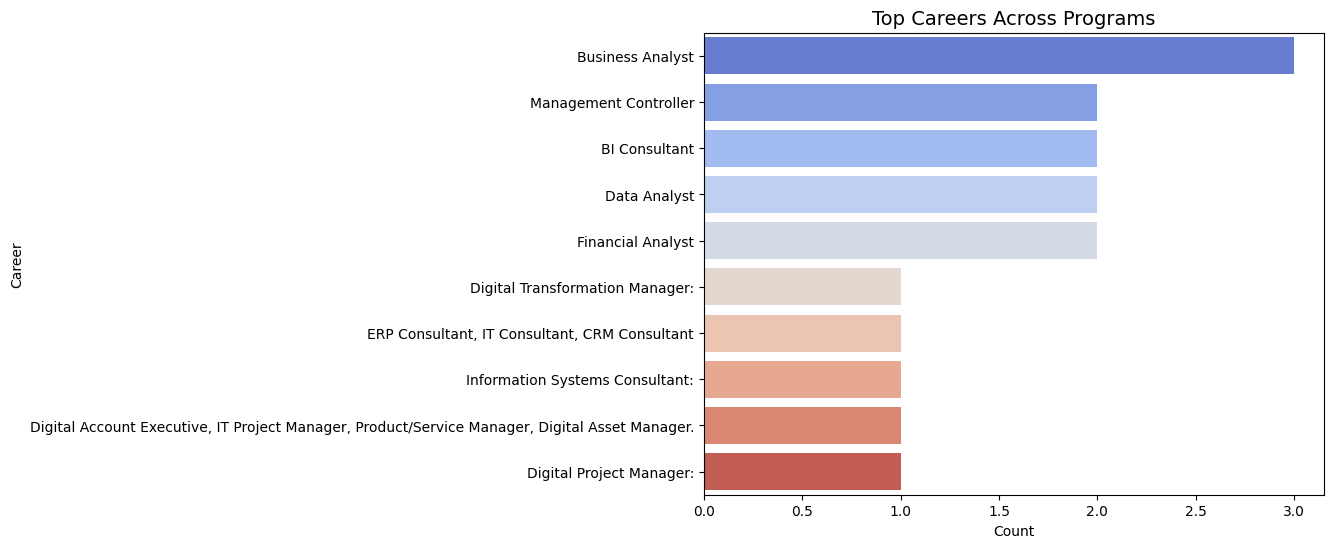

In [301]:

# Career (Careers) Analysis: Top Careers
top_Careers = Careers['Careers'].value_counts().head(10)
plt.figure(figsize=(8, 6))
sns.barplot(y=top_Careers.index, x=top_Careers.values, palette="coolwarm")
plt.title('Top Careers Across Programs', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Career')
plt.show()


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\2763368618.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sectors.index, x=top_sectors.values, palette="mako")


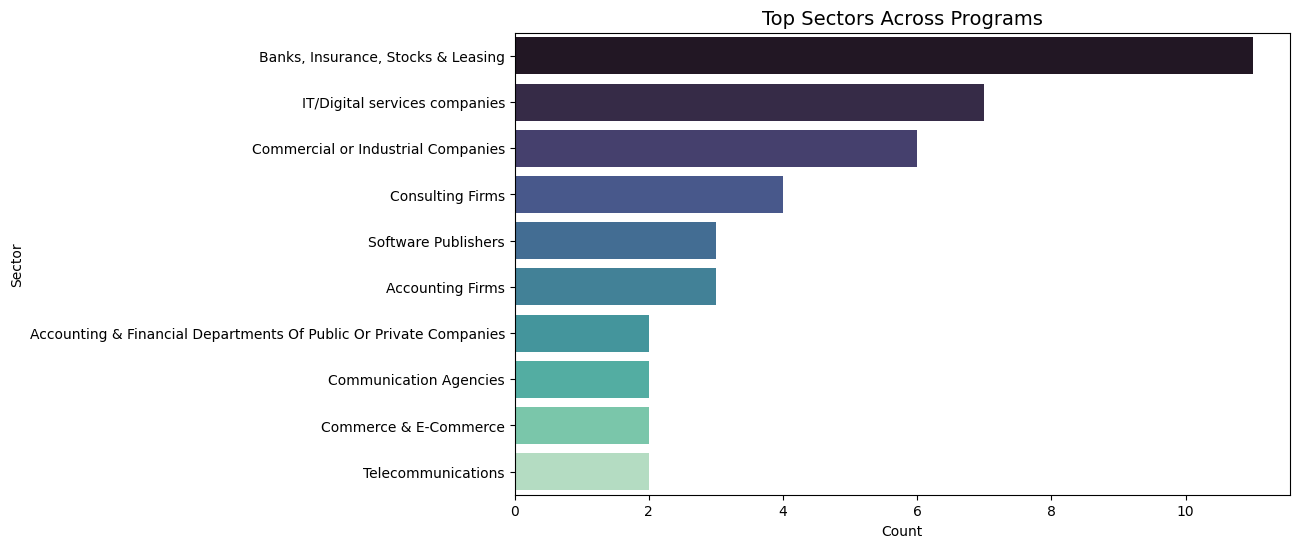

In [302]:

# Sector Analysis: Top Sectors
top_sectors = Sectors['Sectors'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_sectors.index, x=top_sectors.values, palette="mako")
plt.title('Top Sectors Across Programs', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Sector')
plt.show()


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\751419362.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_Subjects.index, x=top_Subjects.values, palette="plasma")


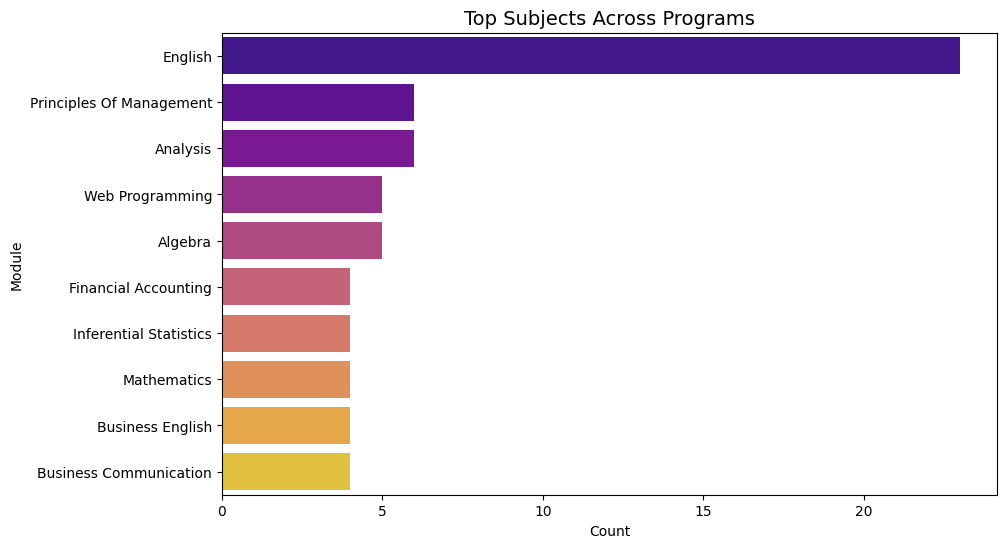

In [303]:

# Module Analysis: Most Common Subjects
top_Subjects = Subjects['Subjects'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_Subjects.index, x=top_Subjects.values, palette="plasma")
plt.title('Top Subjects Across Programs', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Module')
plt.show()


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\2776607682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=credits_dist.index, y=credits_dist.values, palette='coolwarm')
C:\Users\malek\AppData\Local\Temp\ipykernel_58180\2776607682.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=duration_dist.index, y=duration_dist.values, palette='coolwarm')


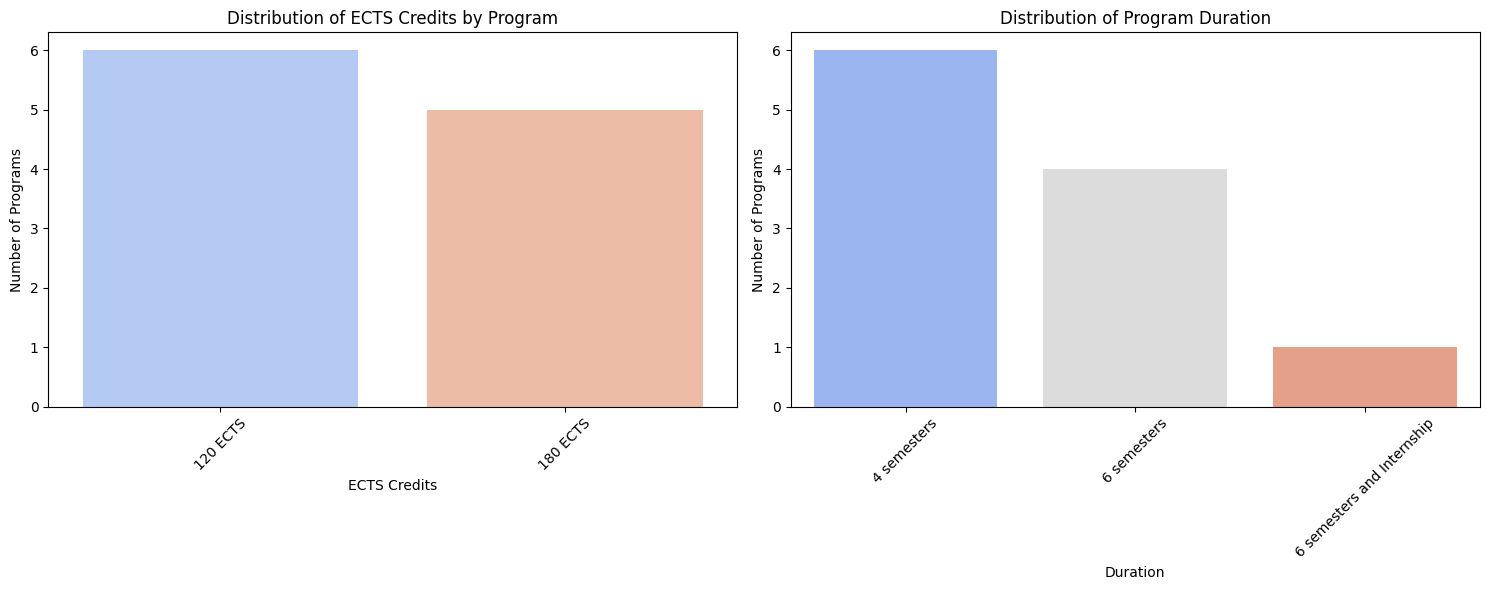

In [304]:
plt.figure(figsize=(15, 6))

# Credits Analysis
plt.subplot(1, 2, 1)
credits_dist = programs['Credits'].value_counts()
sns.barplot(x=credits_dist.index, y=credits_dist.values, palette='coolwarm')
plt.title('Distribution of ECTS Credits by Program', fontsize=12)
plt.xlabel('ECTS Credits')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)

# Duration Analysis
plt.subplot(1, 2, 2)
duration_dist = programs['Duration'].value_counts()
sns.barplot(x=duration_dist.index, y=duration_dist.values, palette='coolwarm')
plt.title('Distribution of Program Duration', fontsize=12)
plt.xlabel('Duration')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

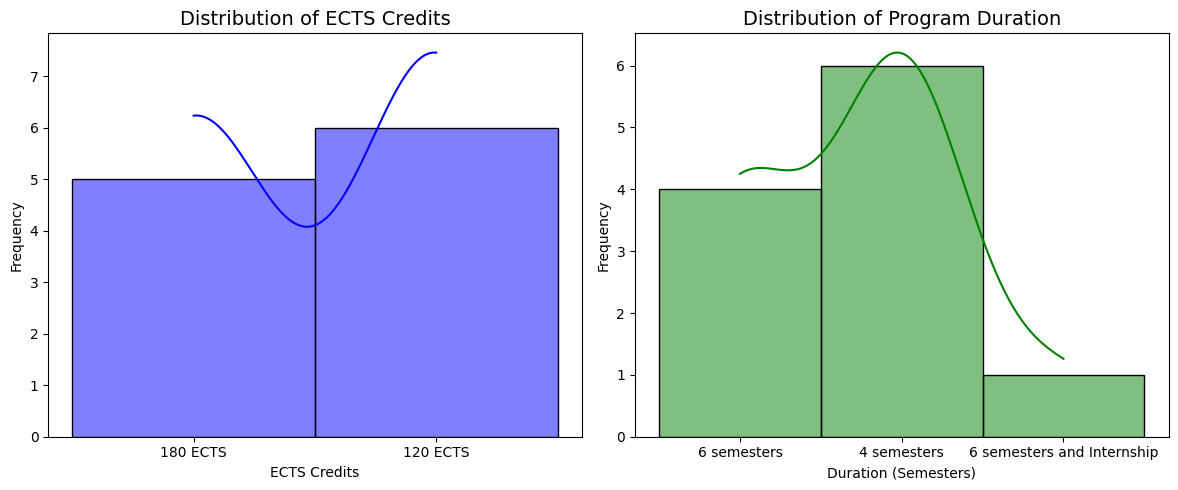

In [305]:

# Detailed Distribution of Credits and Duration
plt.figure(figsize=(12, 5))

# ECTS Credits
plt.subplot(1, 2, 1)
sns.histplot(programs['Credits'], bins=5, kde=True, color='blue')
plt.title('Distribution of ECTS Credits', fontsize=14)
plt.xlabel('ECTS Credits')
plt.ylabel('Frequency')

# Duration
plt.subplot(1, 2, 2)
sns.histplot(programs['Duration'], bins=5, kde=True, color='green')
plt.title('Distribution of Program Duration', fontsize=14)
plt.xlabel('Duration (Semesters)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\1513174493.py:22: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


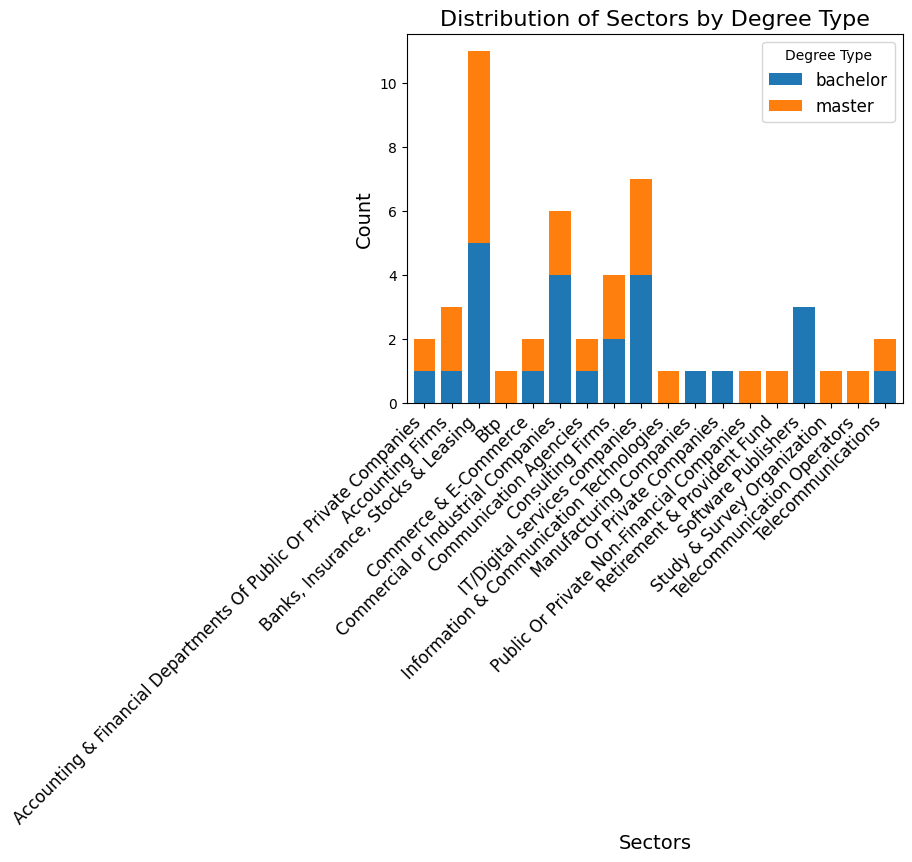

In [306]:

# Create a visualization showing the relationship between degrees and sectors

# Create a new dataframe with degree and sector information
degree_sector_df = programs.explode('Sectors')[['Degree', 'Sectors']]
degree_sector_counts = pd.crosstab(degree_sector_df['Sectors'], degree_sector_df['Degree'])

# Plot stacked bar chart
degree_sector_counts.plot(kind='bar', stacked=True, width=0.8)

# Title and labels
plt.title('Distribution of Sectors by Degree Type', fontsize=16)
plt.xlabel('Sectors', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Rotate x-ticks and make them readable
plt.xticks(rotation=45, ha='right', fontsize=12)

# Adjust legend
plt.legend(title='Degree Type', fontsize=12)

# Add tight layout to avoid overlap
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\1351148737.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=format_dist.values, y=format_dist.index, palette='viridis')


Text(0.5, 0, 'Count')

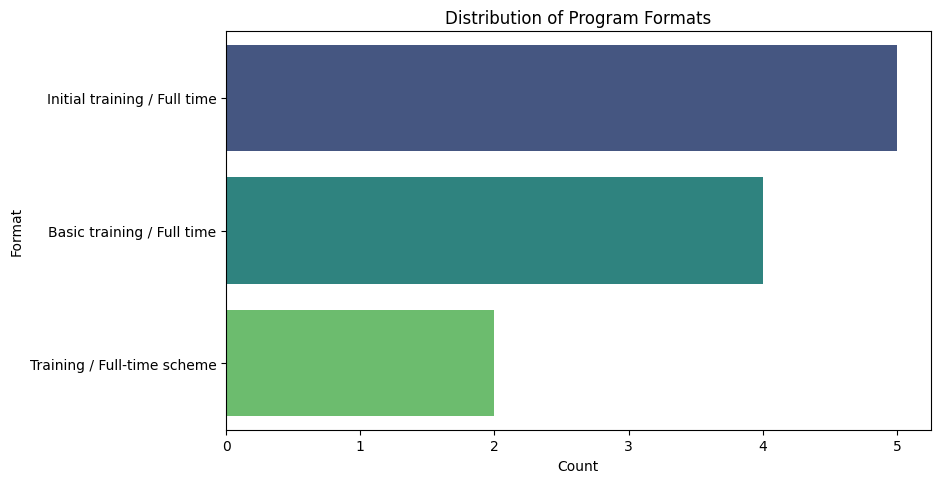

In [307]:
# Figsize needs to be adjusted for better readability of multiple plots
plt.figure(figsize=(20, 30))

# 1. Program Format Distribution
plt.subplot(5, 2, 1)
format_dist = programs['Format'].value_counts()
sns.barplot(x=format_dist.values, y=format_dist.index, palette='viridis')
plt.title('Distribution of Program Formats', fontsize=12)
plt.xlabel('Count')


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\1051020580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=prereq_dist.values, y=prereq_dist.index, palette='magma')


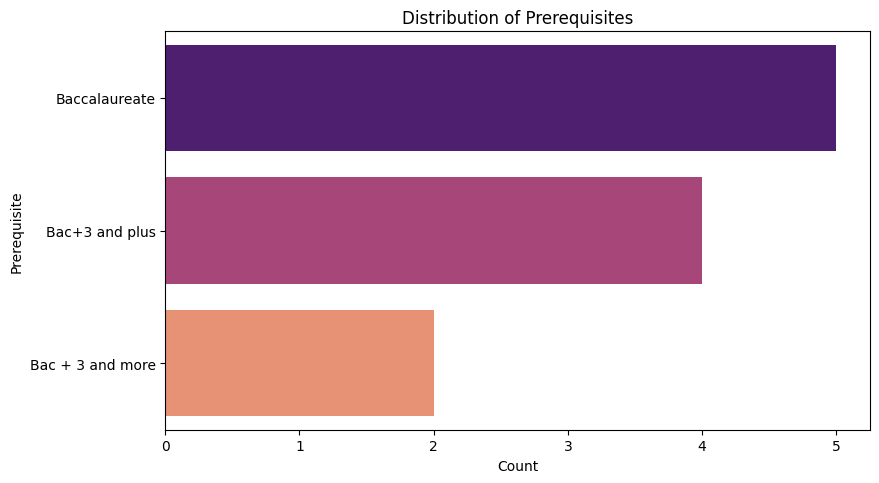

In [308]:
plt.figure(figsize=(20, 30))

# 2. Prerequisite Distribution
plt.subplot(5, 2, 2)
prereq_dist = programs['Prerequisite'].value_counts()
sns.barplot(x=prereq_dist.values, y=prereq_dist.index, palette='magma')
plt.title('Distribution of Prerequisites', fontsize=12)
plt.xlabel('Count')
plt.show()

Text(0.5, 0, 'Number of Skills')

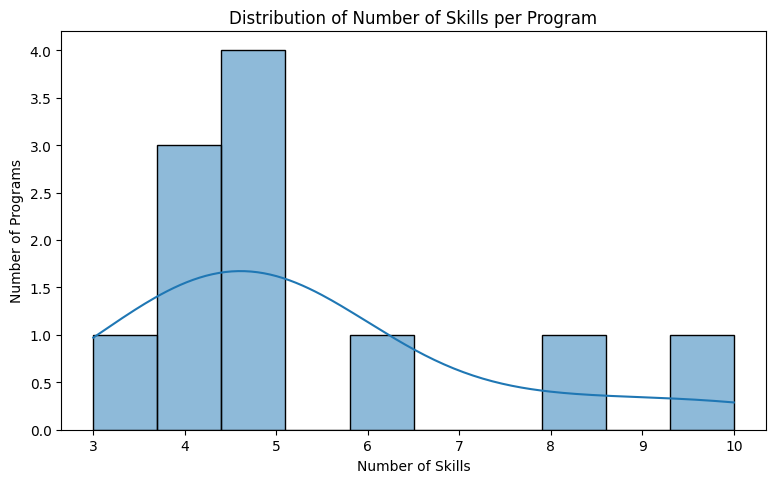

In [309]:
plt.figure(figsize=(20, 30))

# 3. Skills per Program
plt.subplot(5, 2, 3)
skills_per_program = programs.apply(lambda x: len(x['Skills']), axis=1)
sns.histplot(skills_per_program, bins=10, kde=True)
plt.title('Distribution of Number of Skills per Program', fontsize=12)
plt.ylabel('Number of Programs')
plt.xlabel('Number of Skills')

Text(0, 0.5, 'Program')

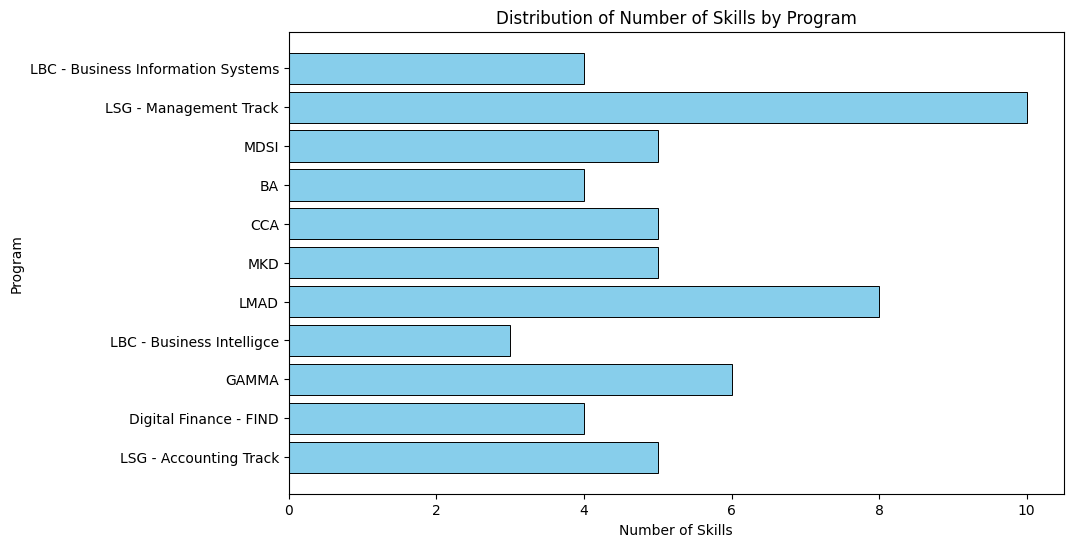

In [310]:

# Create a graph showing skill counts by program name
plt.figure(figsize=(10, 6))

plt.title('Distribution of Number of Skills by Program', fontsize=12)
plt.barh(programs['Title'], skills_per_program, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel('Number of Skills')
plt.ylabel('Program')


Text(0.5, 0, 'Number of Careers')

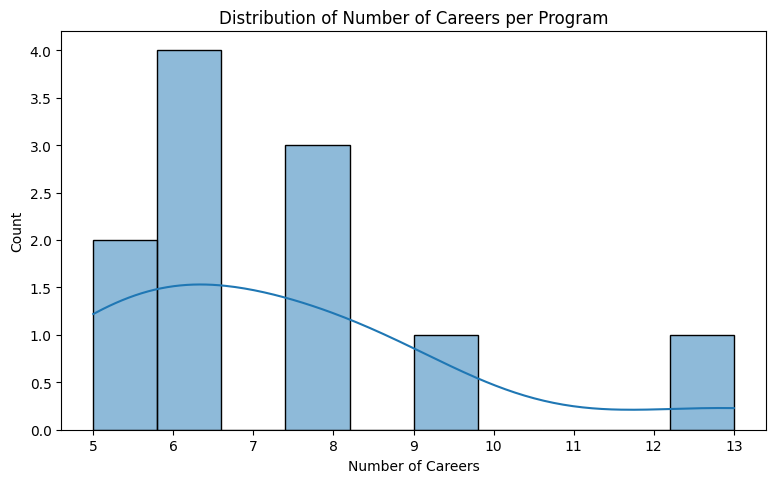

In [311]:
plt.figure(figsize=(20, 30))

# 4. Careers per Program
plt.subplot(5, 2, 4)
careers_per_program = programs.apply(lambda x: len(x['Careers']), axis=1)
sns.histplot(careers_per_program, bins=10, kde=True)
plt.title('Distribution of Number of Careers per Program', fontsize=12)
plt.xlabel('Number of Careers')


Text(0, 0.5, 'Program')

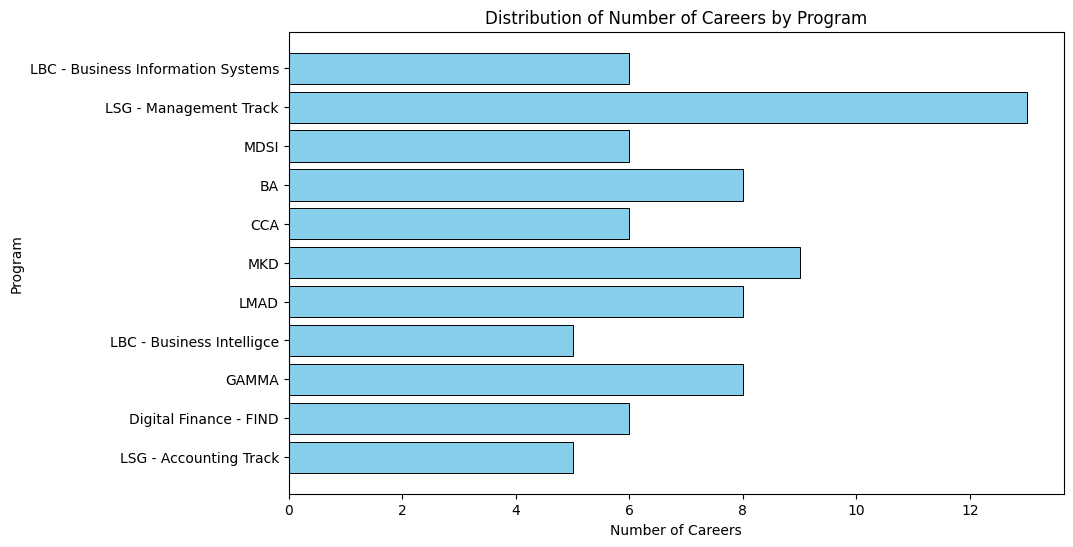

In [312]:

# Create a graph showing skill counts by program name
plt.figure(figsize=(10, 6))

plt.title('Distribution of Number of Careers by Program', fontsize=12)
plt.barh(programs['Title'], careers_per_program, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel('Number of Careers')
plt.ylabel('Program')


Text(0.5, 0, 'Number of Subjects')

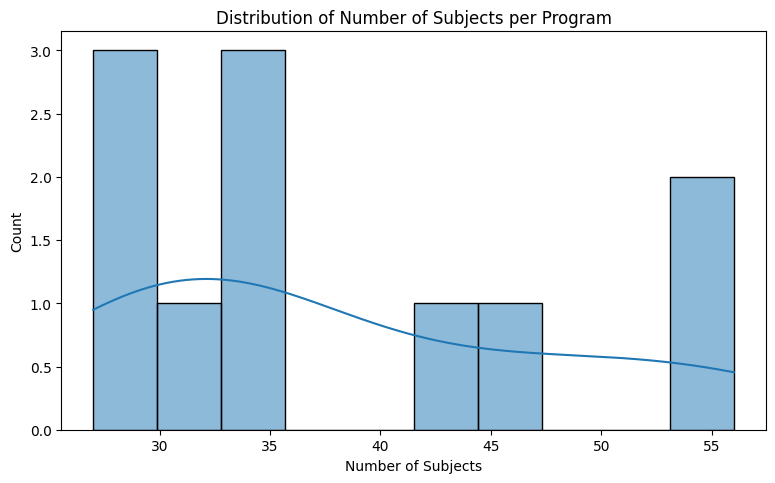

In [313]:
plt.figure(figsize=(20, 30))

# 9. Subjects per Program Distribution
plt.subplot(5, 2, 9)
subjects_per_program = programs.apply(lambda x: len(x['Subjects']), axis=1)
sns.histplot(subjects_per_program, bins=10, kde=True)
plt.title('Distribution of Number of Subjects per Program', fontsize=12)
plt.xlabel('Number of Subjects')


Text(0, 0.5, 'Program')

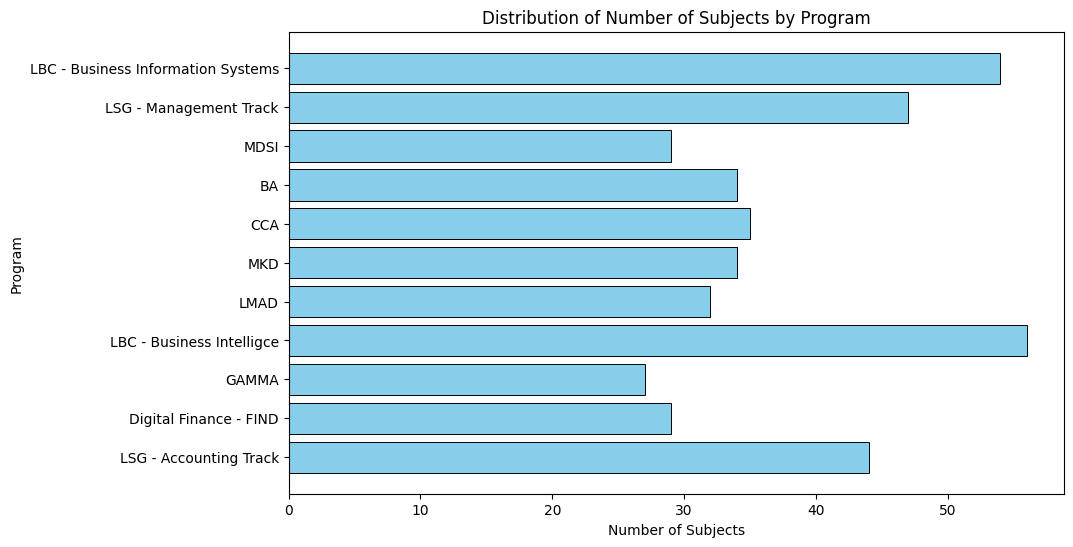

In [314]:

# Create a graph showing skill counts by program name
plt.figure(figsize=(10, 6))

plt.title('Distribution of Number of Subjects by Program', fontsize=12)
plt.barh(programs['Title'], subjects_per_program, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel('Number of Subjects')
plt.ylabel('Program')


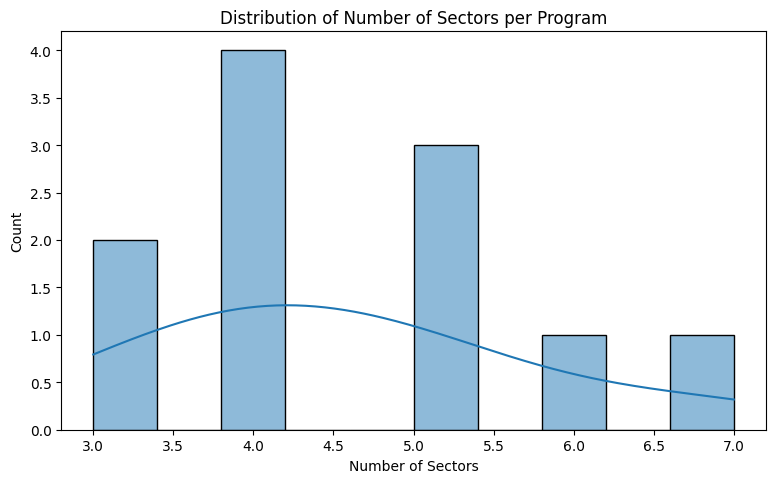

In [315]:
plt.figure(figsize=(20, 30))

# 10. Sectors per Program Distribution
plt.subplot(5, 2, 10)
sectors_per_program = programs.apply(lambda x: len(x['Sectors']), axis=1)
sns.histplot(sectors_per_program, bins=10, kde=True)
plt.title('Distribution of Number of Sectors per Program', fontsize=12)
plt.xlabel('Number of Sectors')

plt.show()

Text(0, 0.5, 'Program')

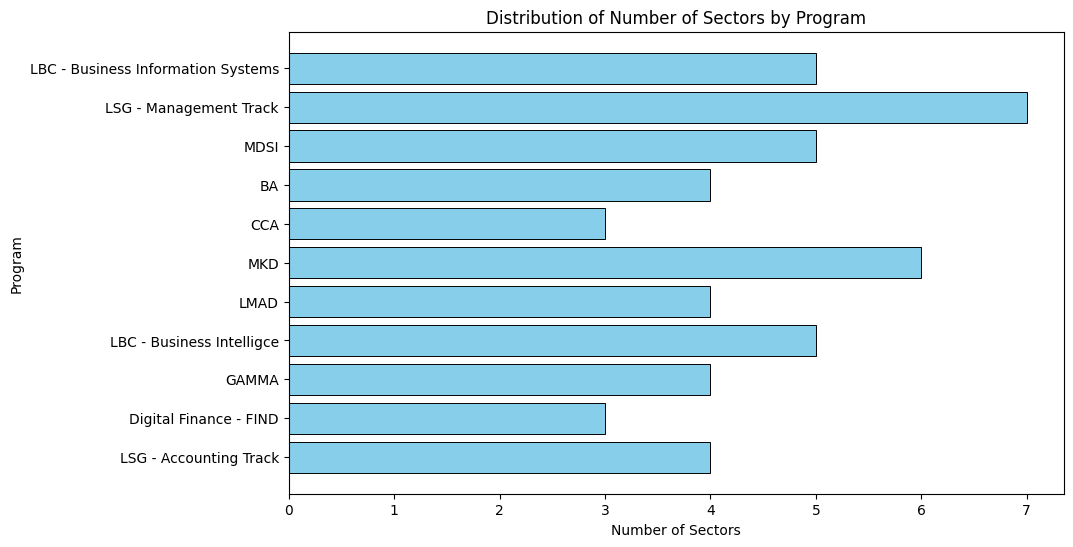

In [316]:

# Create a graph showing skill counts by program name
plt.figure(figsize=(10, 6))

plt.title('Distribution of Number of Sectors by Program', fontsize=12)
plt.barh(programs['Title'], sectors_per_program, color='skyblue', edgecolor='black', linewidth=0.7)
plt.xlabel('Number of Sectors')
plt.ylabel('Program')


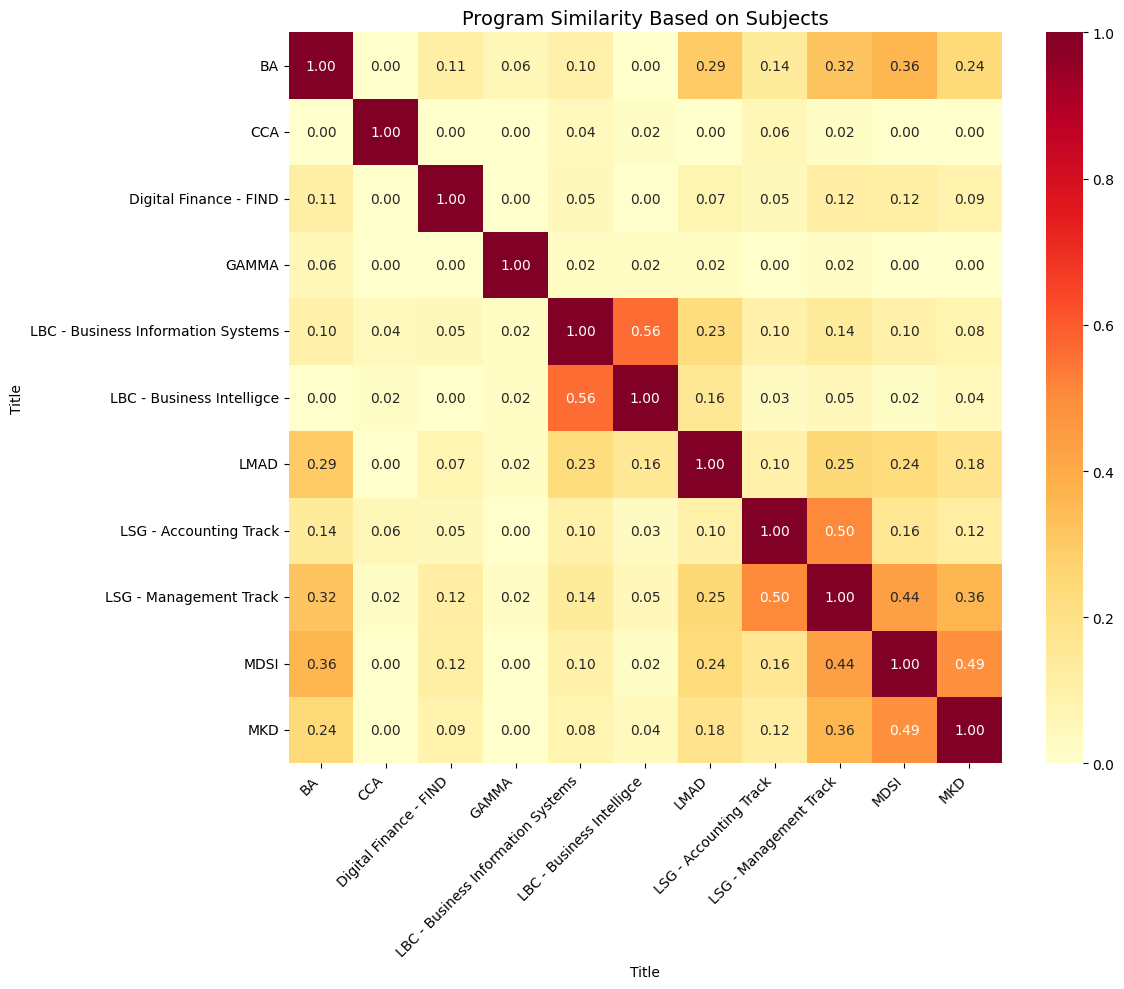

In [322]:
from sklearn.metrics.pairwise import cosine_similarity

# Create a binary matrix of programs and their subjects
program_subject_matrix = pd.crosstab(Subjects['Title'], Subjects['Subjects'])

# Calculate similarity between programs using cosine similarity
similarity_matrix = cosine_similarity(program_subject_matrix)

# Create a DataFrame for better visualization
similarity_df = pd.DataFrame(
    similarity_matrix, 
    index=program_subject_matrix.index.unique(), 
    columns=program_subject_matrix.index.unique()
)

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_df, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Program Similarity Based on Subjects', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

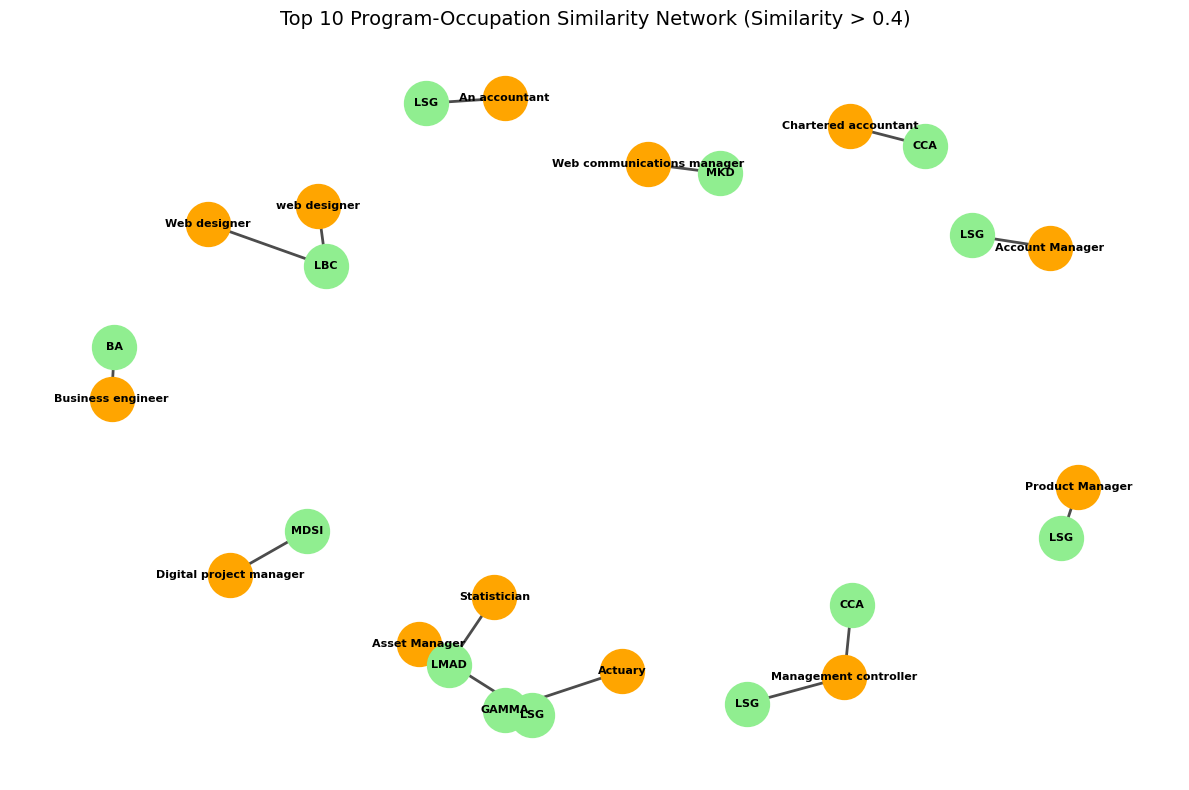

In [319]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import json
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the CSV and JSON files
df = pd.read_csv('studyramaEnglish.csv')
with open('L+MFinal.json', 'r') as f:
    programs_data = json.load(f)

# Extract the occupation column from the CSV
occupations = df['Occupation'].dropna().tolist()

# Assuming L+MFinal.json is a list of dictionaries, each containing 'title' and 'careers'
program_titles = [program['Title'] for program in programs_data]
careers_list = [program['Careers'] for program in programs_data]

# Explode careers list: Flatten the careers for each program into individual pairs
exploded_careers = []
for careers in careers_list:
    exploded_careers.extend(careers)

# Create TF-IDF vectors for occupations and exploded careers
vectorizer = TfidfVectorizer(stop_words='english')

# Combine both occupations and exploded careers into one list
all_texts = occupations + exploded_careers
tfidf_matrix = vectorizer.fit_transform(all_texts)

# Compute cosine similarity between each occupation and each career
occupation_tfidf = tfidf_matrix[:len(occupations)]
careers_tfidf = tfidf_matrix[len(occupations):]

# Compute the cosine similarity matrix
similarity_matrix = cosine_similarity(occupation_tfidf, careers_tfidf)

# Create a network graph
G = nx.Graph()

# Add nodes (programs) as well as exploded careers as separate entities
exploded_programs = [f"{title} - {career}" for title, careers in zip(program_titles, careers_list) for career in careers]

# Collect all edges with similarity scores
edges_with_similarity = []
for i in range(len(occupations)):
    for j in range(len(exploded_careers)):
        similarity = similarity_matrix[i, j]
        if similarity > 0.4:  # Only show stronger relationships
            edges_with_similarity.append((occupations[i], exploded_programs[j], similarity))

# Sort edges by similarity in descending order and pick the top 10
edges_with_similarity.sort(key=lambda x: x[2], reverse=True)
top_10_edges = edges_with_similarity[:15]

# Add only the top 10 edges and their corresponding nodes to the graph
top_10_nodes = set()
for edge in top_10_edges:
    occupation, career, similarity = edge
    G.add_edge(occupation, career, weight=similarity)
    top_10_nodes.add(occupation)
    top_10_nodes.add(career)

# Create the visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1.6, iterations=200)  # Adjust k for more spacing, increase iterations for stability

# Draw occupation nodes with occupation labels
occupation_nodes = [node for node in top_10_nodes if node in occupations]
nx.draw_networkx_nodes(G, pos, node_color='orange', node_size=1000, nodelist=occupation_nodes)
nx.draw_networkx_labels(G, pos, labels={node: node for node in occupation_nodes}, font_size=8, font_weight='bold', verticalalignment="center")

# Draw program nodes with program labels (only showing the program name)
program_nodes = [node for node in top_10_nodes if node not in occupations]
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=1000, nodelist=program_nodes)
nx.draw_networkx_labels(G, pos, labels={node: node.split(" - ")[0] for node in program_nodes}, font_size=8, font_weight='bold', verticalalignment="center")

# Draw edges with appropriate weights
nx.draw_networkx_edges(G, pos, width=[G[u][v]['weight'] * 2 for u, v in G.edges()], alpha=0.7)  # Line transparency

plt.title('Top 10 Program-Occupation Similarity Network (Similarity > 0.4)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


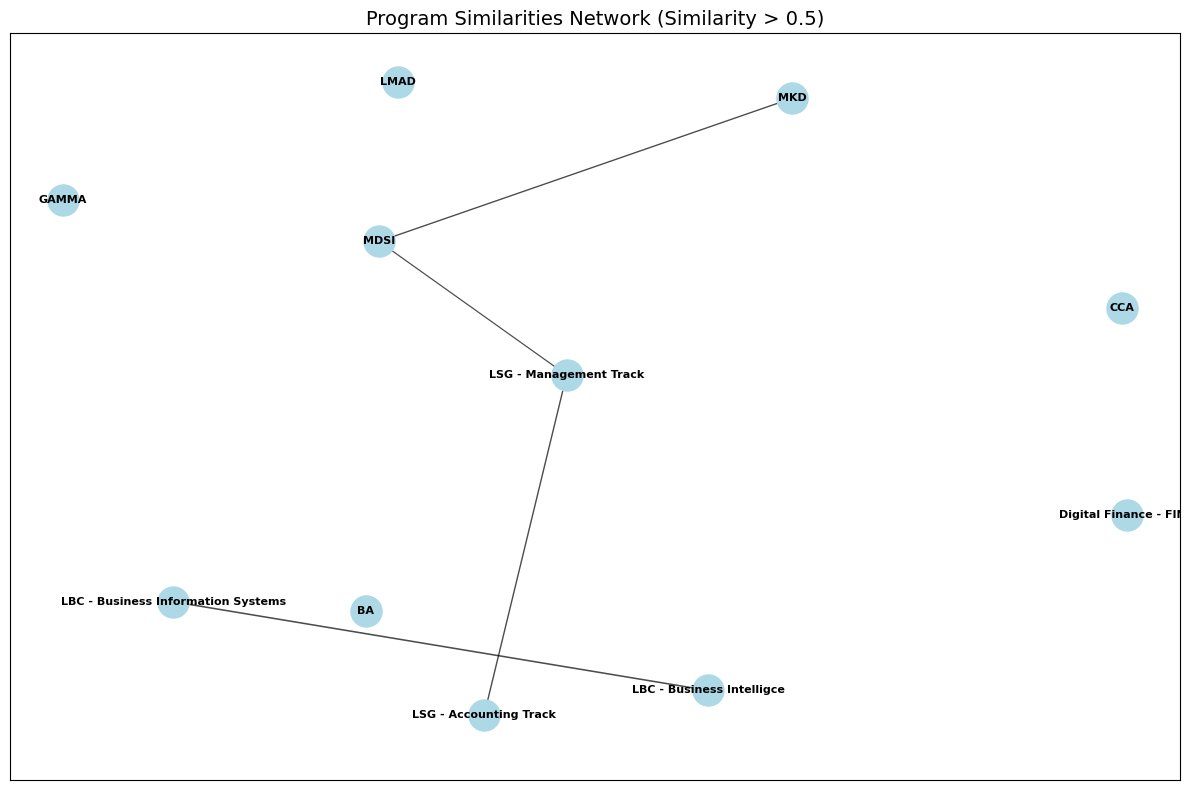

In [ ]:

# Create a network graph
G = nx.Graph()

# Add nodes (programs)
programs = similarity_df.index.tolist()
G.add_nodes_from(programs)

# Add edges with similarity weights
edges = [
    (programs[i], programs[j], similarity_df.iloc[i, j])
    for i in range(len(programs))
    for j in range(i + 1, len(programs))
    if similarity_df.iloc[i, j] > 0.4  # Only add edges with similarity > 0.2
]

# Add edges to the graph
G.add_weighted_edges_from(edges)

# Create the visualization
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw the network with refined styling
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
edge_widths = [G[u][v]['weight'] * 2 for u, v in G.edges()]  # Adjust edge width based on similarity
nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

# Display the graph
plt.title('Program Similarities Network (Similarity > 0.5)', fontsize=14)
plt.axis('on')
plt.tight_layout()
plt.show()

This image depicts a network graph, specifically a "Program Similarities Network," visualized using a spring layout. Here's an interpretation:

Nodes (Circles): Each circle represents a program or course (e.g., GAMMA, BA, LSG-Accounting Track).

Edges (Lines): The lines connecting the circles represent the similarity between the programs. A line exists only if the similarity is greater than 0.2 (as indicated in the title). Thicker lines might indicate stronger similarities.

Spring Layout: This layout algorithm tries to arrange the nodes in a way that minimizes edge crossings and distributes them evenly. It works by treating the edges as springs:

Connected nodes are pulled together: The stronger the connection (similarity), the stronger the pull.
Nodes repel each other: This prevents all nodes from clumping together in the center.
Interpretation of the Structure:

Clusters: Nodes that are closely connected form clusters. For example, BA, LMAD, MKD, and MDSI form a tightly connected cluster, suggesting these programs have significant overlap or similarities.
Isolated Nodes: Nodes like GAMMA, LSG-Accounting Track, and Digital Finance - FIND are relatively isolated, indicating they have little similarity with other programs in the network (at least above the 0.2 threshold).
Bridges: Some nodes act as bridges connecting different clusters. For instance, LSG-Management Track connects the BA/LMAD/MKD/MDSI cluster to the LSG-Accounting Track and has some connection to the LBC programs.
LBC Programs: The LBC-Business Intelligence and LBC-Business Information Systems are connected to each other, showing a relationship between these two programs, but they are more loosely related to the other clusters.
Overall Meaning:

The graph visually represents the relationships and similarities between different programs. It helps to:

Identify related programs: Programs within the same cluster are likely to share content, skills, or target similar career paths.
Spot unique programs: Isolated nodes represent programs that are distinct and offer specialized knowledge or skills.
Understand program dependencies or connections: The connections show how programs relate to each other and might suggest prerequisites or complementary courses.
In summary, this spring layout provides a clear visual representation of program similarities, allowing for easy identification of clusters, isolated programs, and connections between different areas of study.

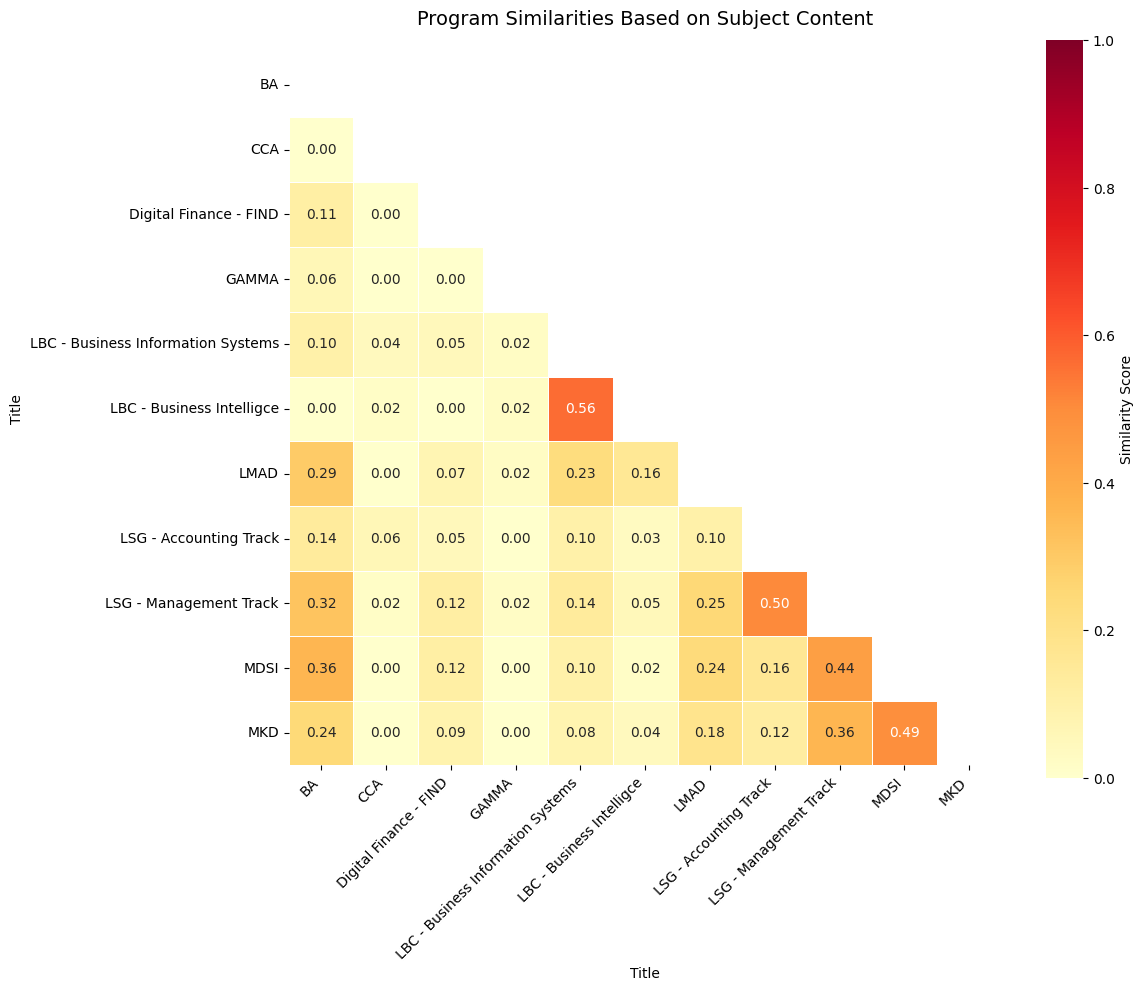

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(similarity_df))  # Create mask for upper triangle

# Create heatmap with improved readability
sns.heatmap(similarity_df, 
            mask=mask,  # Only show lower triangle
            annot=True,  # Show numbers
            fmt='.2f',  # Format numbers to 2 decimal places
            cmap='YlOrRd',  # Use a color scheme that's easy to interpret
            square=True,  # Make cells square
            linewidths=0.5,  # Add cell borders
            cbar_kws={'label': 'Similarity Score'},
            vmin=0, 
            vmax=1)

plt.title('Program Similarities Based on Subject Content', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Similarity Score')

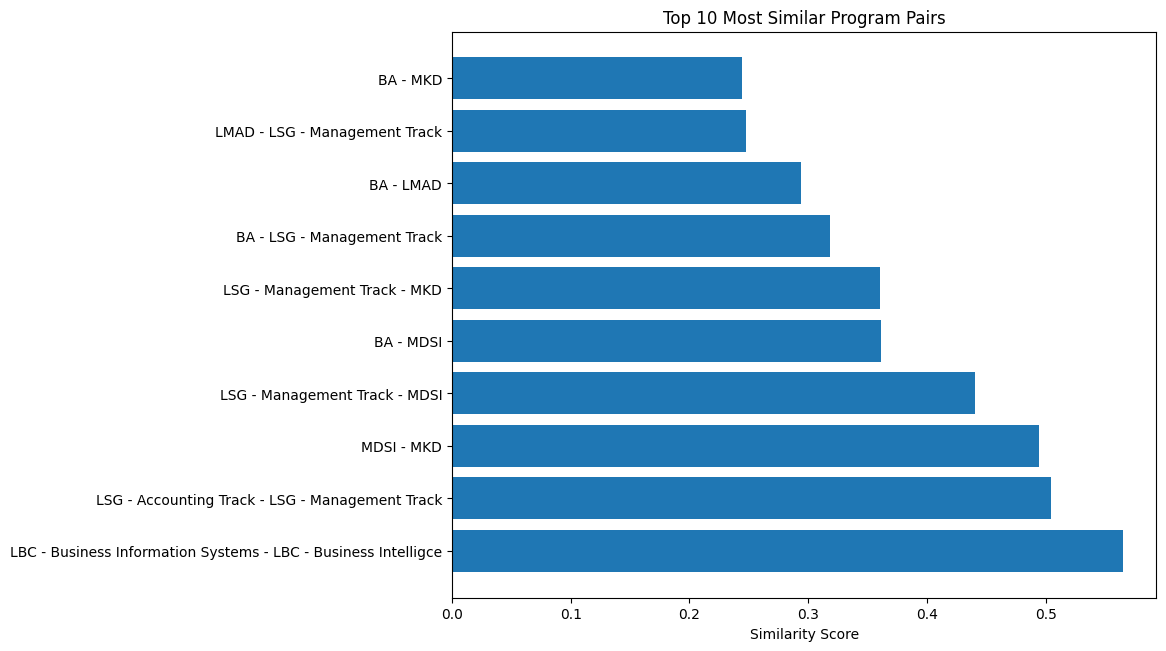

In [ ]:

# Create a subplot figure with 5 new visualizations
fig = plt.figure(figsize=(20, 25))

# 1. Top Similar Program Pairs
plt.subplot(3, 2, 1)
pairs = []
for i in range(len(programs)):
    for j in range(i+1, len(programs)):
        pairs.append((programs[i], programs[j], similarity_df.iloc[i,j]))
top_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)[:10]

plt.barh([f"{p1} - {p2}" for p1,p2,_ in top_pairs], [s for _,_,s in top_pairs])
plt.title('Top 10 Most Similar Program Pairs')
plt.xlabel('Similarity Score')


Text(0, 0.5, 'Frequency')

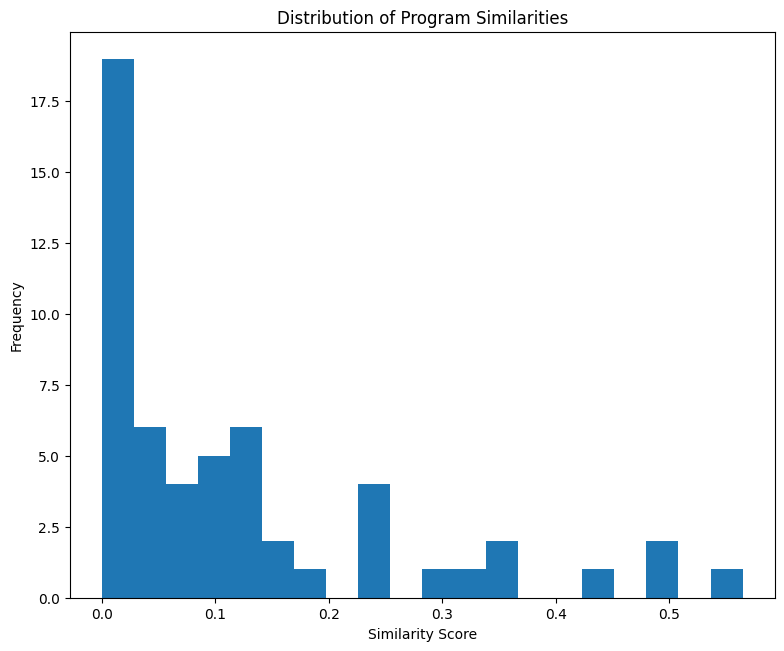

In [ ]:
fig = plt.figure(figsize=(20, 25))

# 2. Program Similarity Distribution
plt.subplot(3, 2, 2)
flat_similarities = similarity_df.values[np.triu_indices_from(similarity_df.values, k=1)]
plt.hist(flat_similarities, bins=20)
plt.title('Distribution of Program Similarities')
plt.xlabel('Similarity Score')
plt.ylabel('Frequency')


Text(0.5, 0, 'Average Similarity')

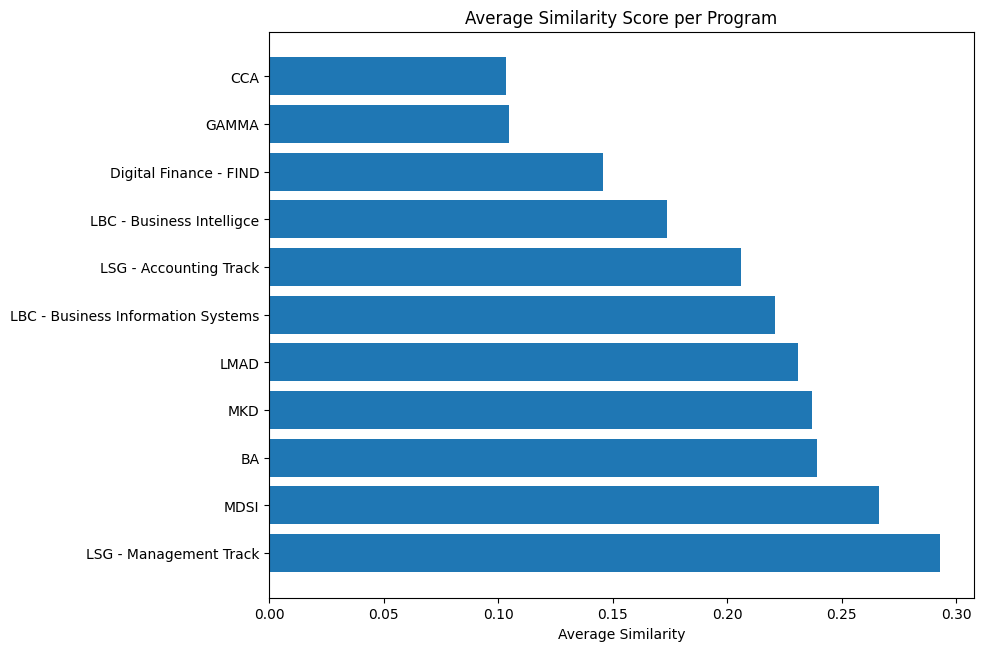

In [ ]:
fig = plt.figure(figsize=(20, 25))

# 3. Average Similarity per Program
plt.subplot(3, 2, 3)
avg_similarities = similarity_df.mean().sort_values(ascending=False)
plt.barh(avg_similarities.index, avg_similarities.values)
plt.title('Average Similarity Score per Program')
plt.xlabel('Average Similarity')


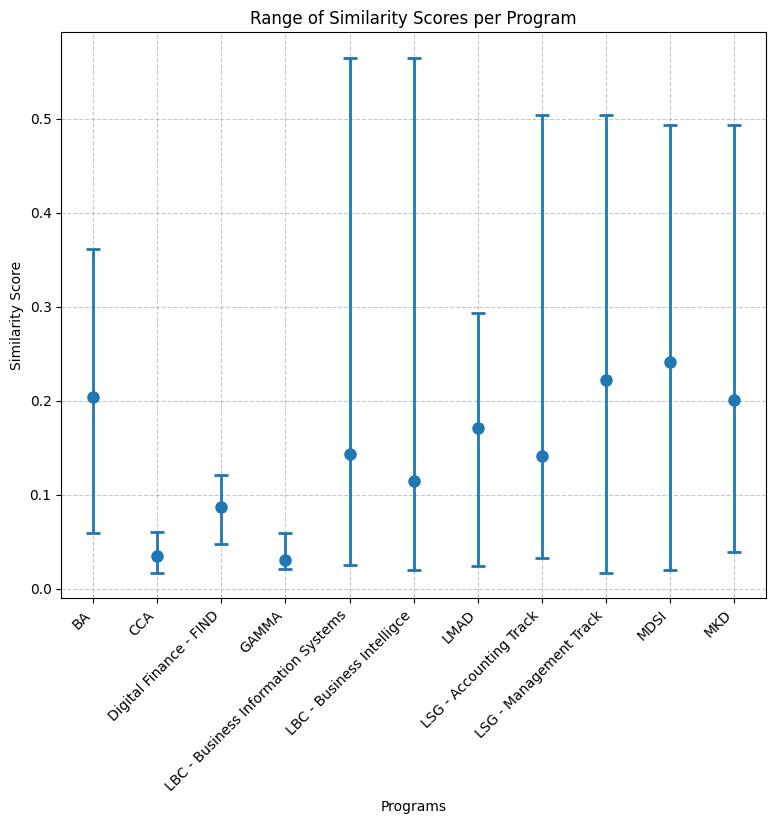

In [ ]:
fig = plt.figure(figsize=(20, 25))

# 4. Similarity Score Range per Program
plt.subplot(3, 2, 4)
min_sim = []
max_sim = []
mean_sim = []

for program in programs:
	similarities = similarity_df[program].drop(program)  # Exclude self-similarity (1.0)
	non_zero_similarities = similarities[similarities > 0]  # Exclude zero similarities
	if len(non_zero_similarities) > 0:
		min_sim.append(non_zero_similarities.min())
		max_sim.append(non_zero_similarities.max())
		mean_sim.append(non_zero_similarities.mean())
	else:
		min_sim.append(0)
		max_sim.append(0)
		mean_sim.append(0)

plt.errorbar(range(len(programs)), mean_sim, 
			 yerr=[np.array(mean_sim) - np.array(min_sim), 
				   np.array(max_sim) - np.array(mean_sim)],
			 fmt='o', capsize=5, capthick=2, elinewidth=2, markersize=8)
plt.xticks(range(len(programs)), programs, rotation=45, ha='right')
plt.title('Range of Similarity Scores per Program', fontsize=12)
plt.ylabel('Similarity Score')
plt.xlabel('Programs')
plt.grid(True, linestyle='--', alpha=0.7)


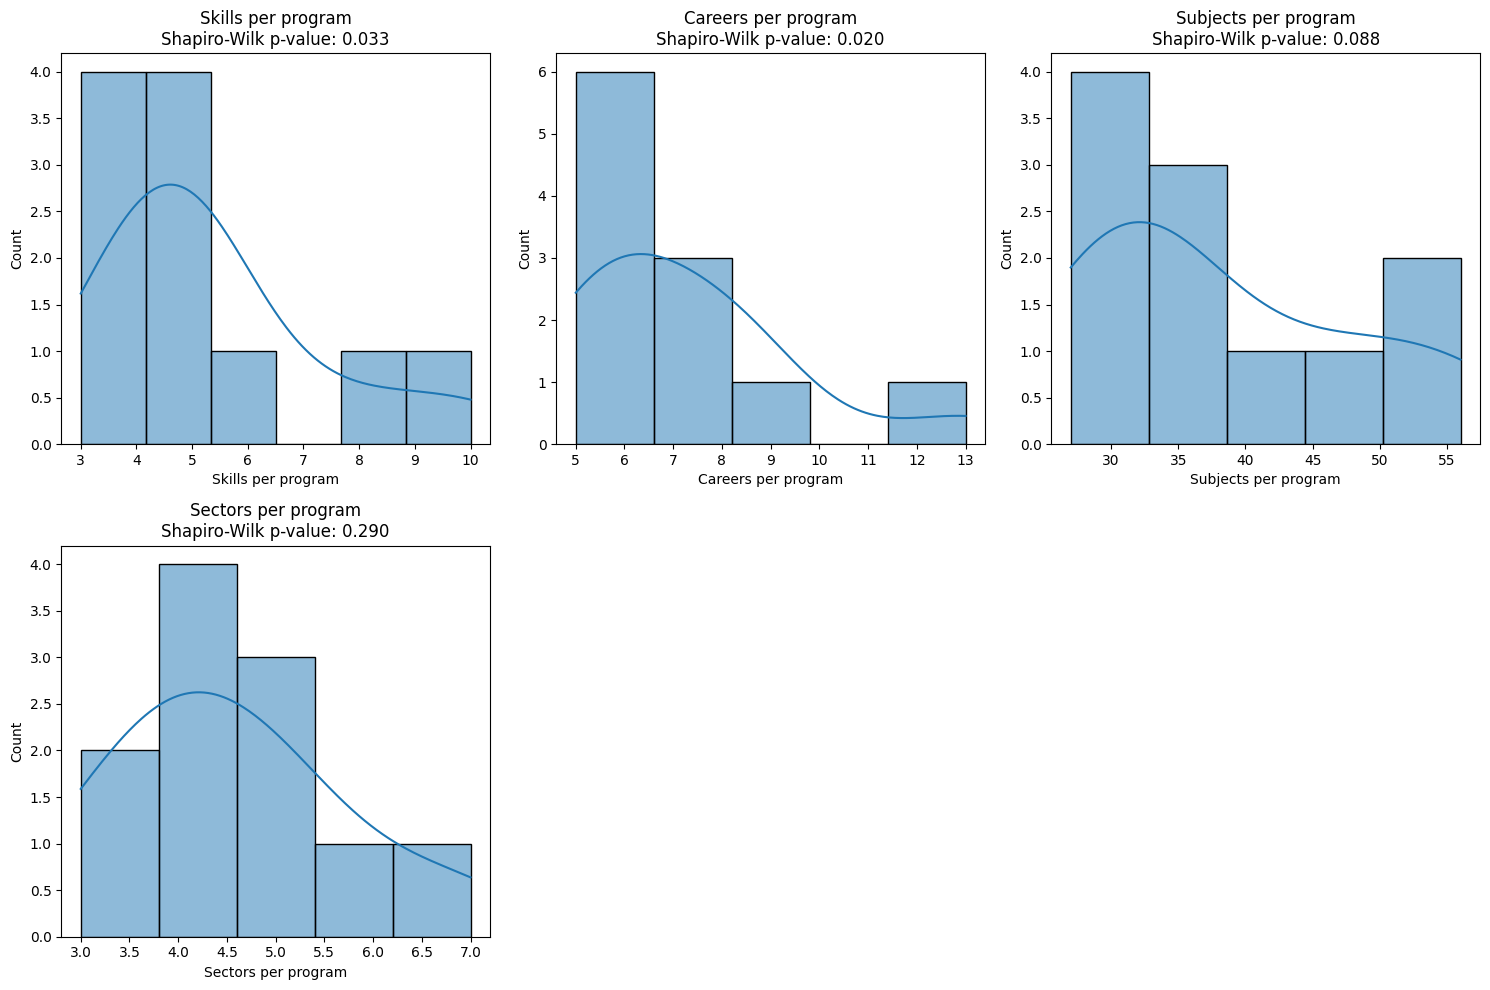


Detailed Normality Test Results:
--------------------------------------------------

Skills per program:
Shapiro-Wilk test - statistic: 0.842, p-value: 0.033
D'Agostino-Pearson test - statistic: 6.791, p-value: 0.034
Skewness: 1.249
Kurtosis: 0.695

Careers per program:
Shapiro-Wilk test - statistic: 0.825, p-value: 0.020
D'Agostino-Pearson test - statistic: 8.964, p-value: 0.011
Skewness: 1.351
Kurtosis: 1.307

Subjects per program:
Shapiro-Wilk test - statistic: 0.874, p-value: 0.088
D'Agostino-Pearson test - statistic: 1.862, p-value: 0.394
Skewness: 0.662
Kurtosis: -1.027

Sectors per program:
Shapiro-Wilk test - statistic: 0.916, p-value: 0.290
D'Agostino-Pearson test - statistic: 1.346, p-value: 0.510
Skewness: 0.594
Kurtosis: -0.329


c:\Users\malek\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [ ]:
from scipy import stats
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt

# Create figure for multiple plots
plt.figure(figsize=(15, 10))

# List of numerical variables to test
numerical_vars = {
    'Skills per program': skills_per_program,
    'Careers per program': careers_per_program,
    'Subjects per program': subjects_per_program,
    'Sectors per program': sectors_per_program
}

# Perform tests and create plots for each variable
for idx, (name, data) in enumerate(numerical_vars.items(), 1):
    # Create subplot
    plt.subplot(2, 3, idx)
    
    # Create histogram with KDE
    sns.histplot(data, kde=True)
    plt.title(f'{name}\nShapiro-Wilk p-value: {stats.shapiro(data)[1]:.3f}')
    plt.xlabel(name)
    
plt.tight_layout()
plt.show()

# Print detailed statistics
print("\nDetailed Normality Test Results:")
print("-" * 50)
for name, data in numerical_vars.items():
    # Shapiro-Wilk test
    shapiro_stat, shapiro_p = stats.shapiro(data)
    
    # D'Agostino-Pearson test
    k2_stat, k2_p = stats.normaltest(data)
    
    print(f"\n{name}:")
    print(f"Shapiro-Wilk test - statistic: {shapiro_stat:.3f}, p-value: {shapiro_p:.3f}")
    print(f"D'Agostino-Pearson test - statistic: {k2_stat:.3f}, p-value: {k2_p:.3f}")
    print(f"Skewness: {stats.skew(data):.3f}")
    print(f"Kurtosis: {stats.kurtosis(data):.3f}")

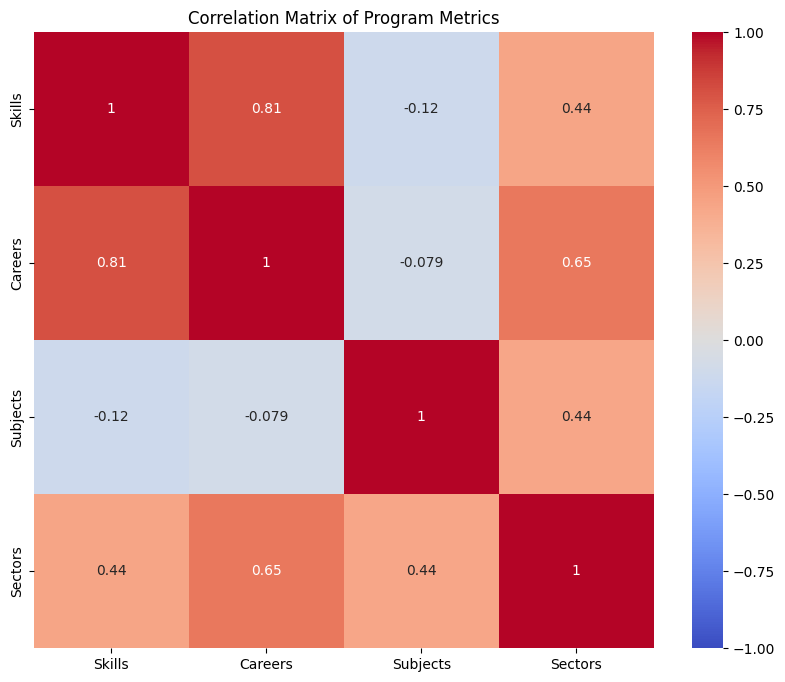


Detailed Statistical Analysis:
--------------------------------------------------

Pearson Correlation Analysis:
Skills vs Careers:
Correlation coefficient: 0.809
P-value: 0.003

Skills vs Subjects:
Correlation coefficient: -0.116
P-value: 0.733

Skills vs Sectors:
Correlation coefficient: 0.443
P-value: 0.173

Careers vs Subjects:
Correlation coefficient: -0.079
P-value: 0.818

Careers vs Sectors:
Correlation coefficient: 0.650
P-value: 0.030

Subjects vs Sectors:
Correlation coefficient: 0.436
P-value: 0.180


One-way ANOVA Results:
F-statistic: 100.449
P-value: 0.000

Basic Statistical Measures:
          Skills    Careers   Subjects    Sectors
count  11.000000  11.000000  11.000000  11.000000
mean    5.363636   7.272727  38.272727   4.545455
std     2.013590   2.327699  10.277071   1.213560
min     3.000000   5.000000  27.000000   3.000000
25%     4.000000   6.000000  30.500000   4.000000
50%     5.000000   6.000000  34.000000   4.000000
75%     5.500000   8.000000  45.500000   5.

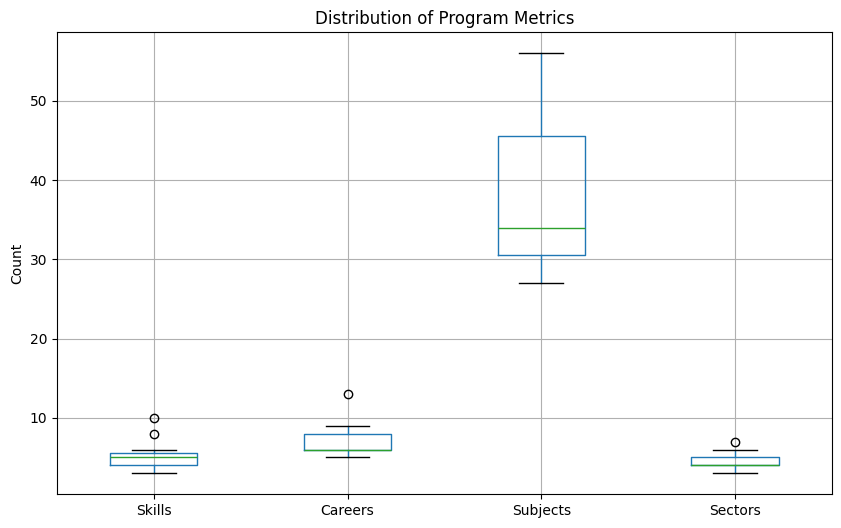

In [ ]:
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns

import scipy.stats as stats
import matplotlib.pyplot as plt

# Create a dictionary of numerical variables
numerical_data = {
    'Skills': skills_per_program,
    'Careers': careers_per_program,
    'Subjects': subjects_per_program,
    'Sectors': sectors_per_program
}

# Convert to DataFrame for easier analysis
df_stats = pd.DataFrame(numerical_data)

# 1. Correlation Matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df_stats.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Program Metrics')
plt.show()

# 2. Detailed Statistical Analysis
print("\nDetailed Statistical Analysis:")
print("-" * 50)

# Pearson Correlation with p-values
print("\nPearson Correlation Analysis:")
variables = list(numerical_data.keys())
for i in range(len(variables)):
    for j in range(i+1, len(variables)):
        var1, var2 = variables[i], variables[j]
        correlation, p_value = pearsonr(numerical_data[var1], numerical_data[var2])
        print(f"{var1} vs {var2}:")
        print(f"Correlation coefficient: {correlation:.3f}")
        print(f"P-value: {p_value:.3f}")
        print()

# 3. One-way ANOVA between variables
print("\nOne-way ANOVA Results:")
f_statistic, p_value = stats.f_oneway(*[numerical_data[var] for var in variables])
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# 4. Basic Statistical Measures
print("\nBasic Statistical Measures:")
print(df_stats.describe())

# 5. Normality Tests
print("\nShapiro-Wilk Normality Test Results:")
for column in df_stats.columns:
    statistic, p_value = stats.shapiro(df_stats[column])
    print(f"\n{column}:")
    print(f"Statistic: {statistic:.3f}")
    print(f"P-value: {p_value:.3f}")
    print(f"Normal distribution? {'Yes' if p_value > 0.05 else 'No'}")

# 6. Box Plot for Distribution Comparison
plt.figure(figsize=(10, 6))
df_stats.boxplot()
plt.title('Distribution of Program Metrics')
plt.ylabel('Count')
plt.show()

In [34]:
student_df = pd.read_csv('MLDATA.csv')

In [ ]:
student_df.head()

,ID,Birth date,Birth place,Highschool graduation date,Highschool,Studies level,Degree,ESB entry date,Bac type,Current class,Semester 1 class,Degree level,Gender,Nationality,Class level,Previous class,Previous year result,Highschool graduation grade,Final score,Region
0,ID1,1996,Tunis,2020,Lycee Tunis,3.0,BA,2023,Bac Economie,2-BA-2,2-BA-2,2,M,TUNISIENNE,5,1-BA-2,Admis(e),10.61,-1.0,Tunis
1,ID2,2002,Tunis,2021,Lycee Ezzahra,3.0,MKD,2024,Bac Informatique,1-MKD-1,1-MKD-1,1,M,TUNISIENNE,4,External,Admis(e),12.91,-1.0,Ben Arous
2,ID3,2003,Tunis,2024,Lycee Asdrubal Bardo,0.0,LSG,2024,Bac Economie,1-LSG-1,1-LSG-1,1,M,TUNISIENNE,1,External,Admis(e),9.81,-1.0,Ariana
3,ID4,1999,Tunis,2021,Lycee Les Pères Blancs,3.0,MDSI,2021,Bac Economie,1-MDSI-1,1-MDSI-1,1,F,TUNISIENNE,4,3-LSG-4,Admis(e) - Bien,12.00,-1.0,Tunis
4,ID5,1999,Bizerte,2020,Lycee Bhira Bizerte,0.0,LSG,2023,Bac Economie,2-LSG-3,2-LSG-3,2,M,TUNISIENNE,2,1-LSG-8,Admis(e) - Passable,10.48,-1.0,Bizerte


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\3405611478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=degree_dist.values, y=degree_dist.index, palette='viridis')


Text(0, 0.5, 'Degree')

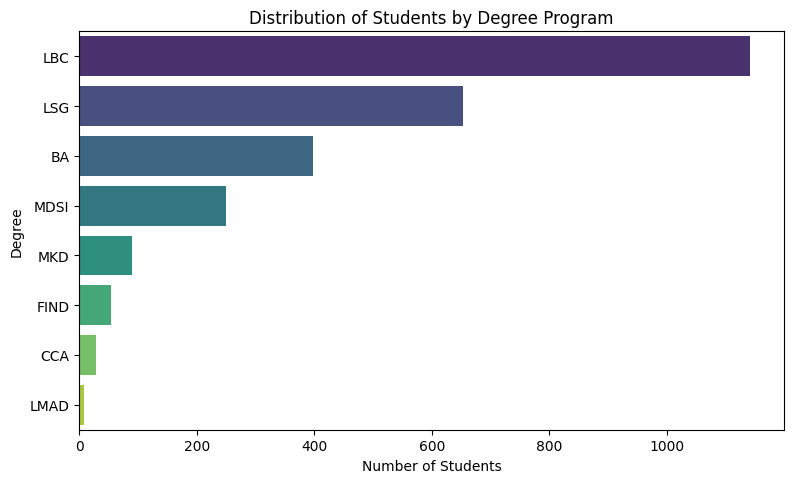

In [ ]:
# Set up the visualization environment
plt.figure(figsize=(20, 30))

# 1. Distribution of Students by Degree
plt.subplot(5, 2, 1)
degree_dist = student_df['Degree'].value_counts()
sns.barplot(x=degree_dist.values, y=degree_dist.index, palette='viridis')
plt.title('Distribution of Students by Degree Program')
plt.xlabel('Number of Students')
plt.ylabel('Degree')


Text(0.5, 1.0, 'Gender Distribution')

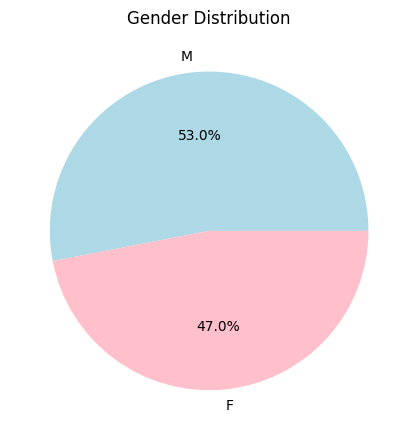

In [ ]:
plt.figure(figsize=(20, 30))

# 2. Gender Distribution
plt.subplot(5, 2, 2)
gender_dist = student_df['Gender'].value_counts()
plt.pie(gender_dist.values, labels=gender_dist.index, autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Gender Distribution')


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\2549031540.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_dist.values, y=region_dist.index, palette='mako')


Text(0.5, 0, 'Number of Students')

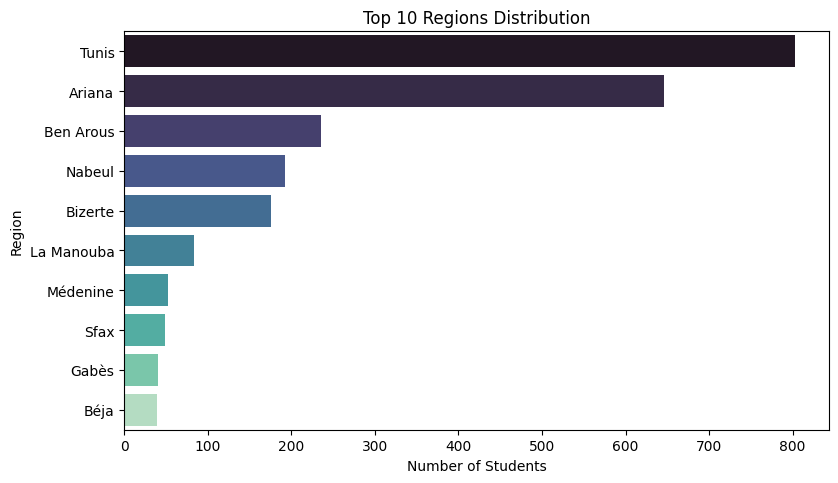

In [ ]:
plt.figure(figsize=(20, 30))

# 3. Distribution by Region
plt.subplot(5, 2, 3)
region_dist = student_df['Region'].value_counts().head(10)
sns.barplot(x=region_dist.values, y=region_dist.index, palette='mako')
plt.title('Top 10 Regions Distribution')
plt.xlabel('Number of Students')


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\200307692.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bac_dist.values, y=bac_dist.index, palette='coolwarm')


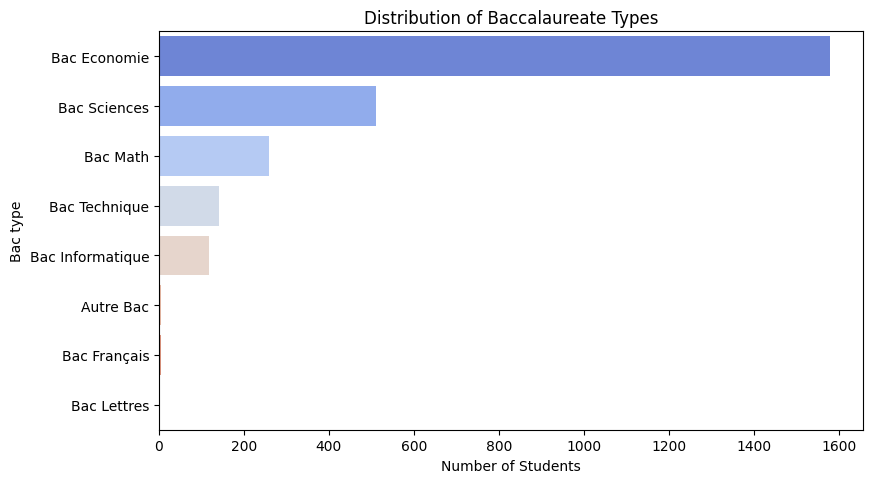

In [ ]:
plt.figure(figsize=(20, 30))

# 4. Bac Type Distribution
plt.subplot(5, 2, 4)
bac_dist = student_df['Bac type'].value_counts()
sns.barplot(x=bac_dist.values, y=bac_dist.index, palette='coolwarm')
plt.title('Distribution of Baccalaureate Types')
plt.xlabel('Number of Students')
plt.autoscale(enable=True, axis='x')  # Enable autoscaling for x-axis



(8.7, 20.0)

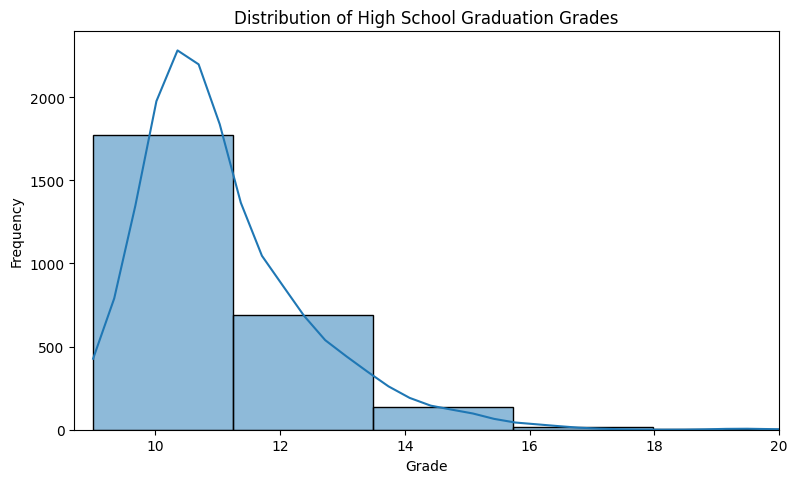

In [ ]:
plt.figure(figsize=(20, 30))

# 5. High School Graduation Grade Distribution
plt.subplot(5, 2, 5)
sns.histplot(student_df['Highschool graduation grade'], bins=30, kde=True)
plt.title('Distribution of High School Graduation Grades')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xlim(8.7, 20)  # Set x-axis limit to 20 for high school grades

C:\Users\malek\AppData\Local\Temp\ipykernel_58180\1231694773.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=level_dist.index, y=level_dist.values, palette='viridis')


Text(0, 0.5, 'Number of Students')

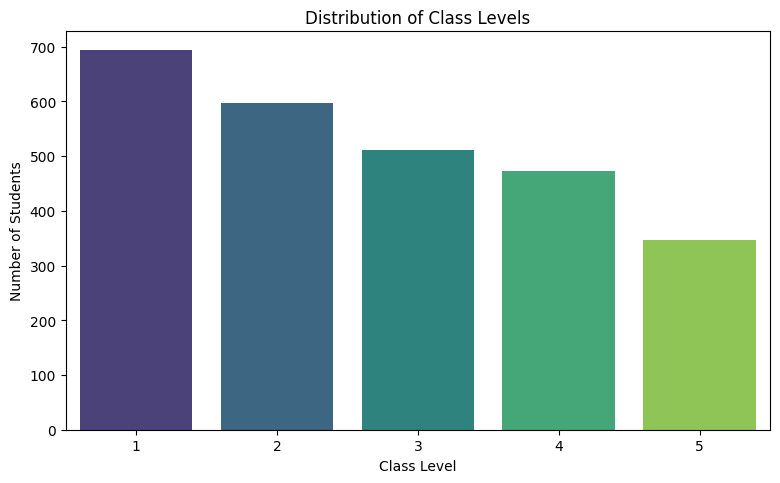

In [ ]:
plt.figure(figsize=(20, 30))

# 6. Class Level Distribution
plt.subplot(5, 2, 6)
level_dist = student_df['Class level'].value_counts().sort_index()
sns.barplot(x=level_dist.index, y=level_dist.values, palette='viridis')
plt.title('Distribution of Class Levels')
plt.xlabel('Class Level')
plt.ylabel('Number of Students')


Text(0, 0.5, 'Number of Students')

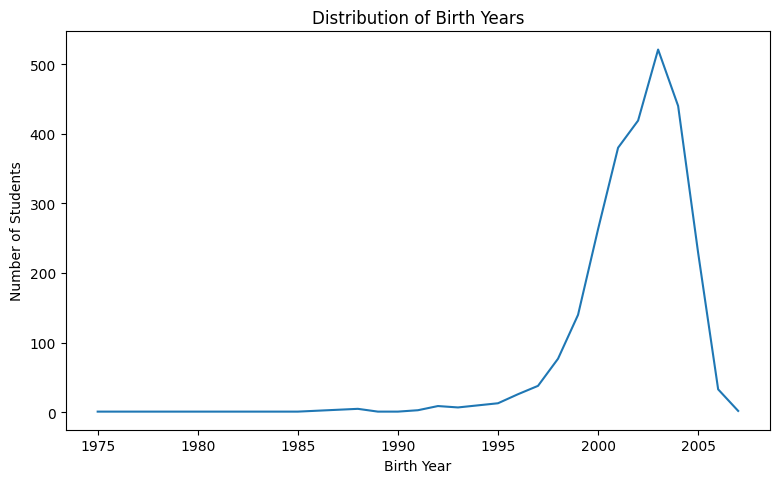

In [ ]:
plt.figure(figsize=(20, 30))

# 7. Birth Year Distribution
plt.subplot(5, 2, 7)
birth_year_dist = student_df['Birth date'].value_counts().sort_index()
sns.lineplot(x=birth_year_dist.index, y=birth_year_dist.values)
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Number of Students')


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\3626484534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=result_dist.values, y=result_dist.index, palette='husl')


Text(0.5, 0, 'Number of Students')

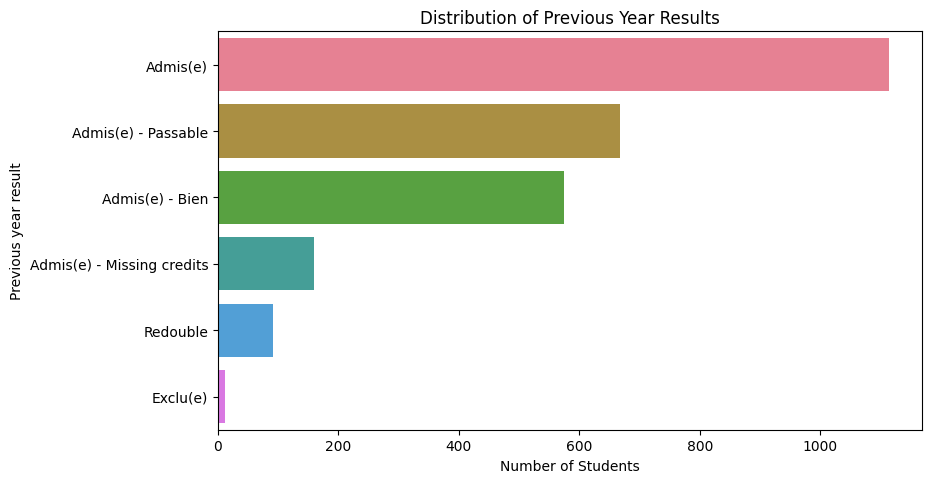

In [ ]:
plt.figure(figsize=(20, 30))

# 8. Previous Year Results
plt.subplot(5, 2, 8)
result_dist = student_df['Previous year result'].value_counts()
sns.barplot(x=result_dist.values, y=result_dist.index, palette='husl')
plt.title('Distribution of Previous Year Results')
plt.xlabel('Number of Students')


C:\Users\malek\AppData\Local\Temp\ipykernel_58180\3695912661.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entry_dist.index, y=entry_dist.values, palette='rocket')


Text(0, 0.5, 'Number of Students')

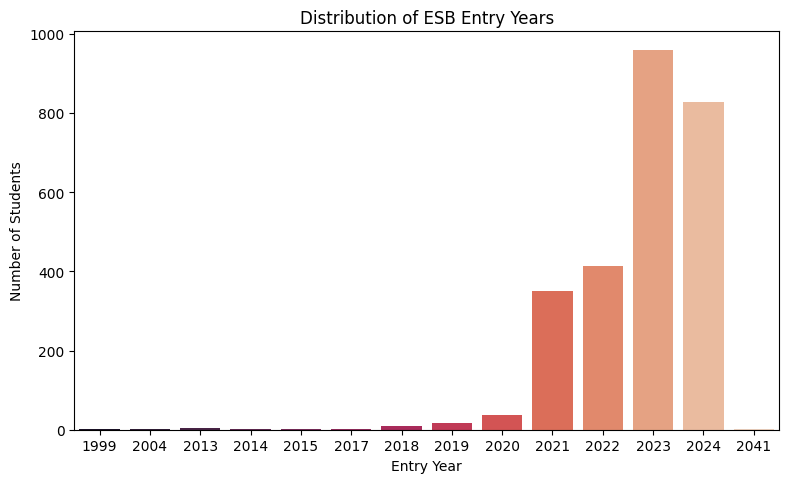

In [ ]:
plt.figure(figsize=(20, 30))

# 9. Entry Year Distribution
plt.subplot(5, 2, 9)
entry_dist = student_df['ESB entry date'].value_counts().sort_index()
sns.barplot(x=entry_dist.index, y=entry_dist.values, palette='rocket')
plt.title('Distribution of ESB Entry Years')
plt.xlabel('Entry Year')
plt.ylabel('Number of Students')


In [ ]:
from scipy.stats import chi2_contingency

import scipy.stats as stats

# 1. Chi-square tests for categorical variables
print("Chi-square Tests for Independence:")
print("-" * 50)

# Test relationship between Gender and Degree
gender_degree_crosstab = pd.crosstab(student_df['Gender'], student_df['Degree'])
chi2, p_val, dof, expected = chi2_contingency(gender_degree_crosstab)
print("\nGender vs Degree:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_val:.4f}")

# Test relationship between Bac type and Degree
bac_degree_crosstab = pd.crosstab(student_df['Bac type'], student_df['Degree'])
chi2, p_val, dof, expected = chi2_contingency(bac_degree_crosstab)
print("\nBac type vs Degree:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"p-value: {p_val:.4f}")


Chi-square Tests for Independence:
--------------------------------------------------

Gender vs Degree:
Chi-square statistic: 39.46
p-value: 0.0000

Bac type vs Degree:
Chi-square statistic: 190.34
p-value: 0.0000


In [46]:

# 2. ANOVA test for high school grades across degrees
print("\nOne-way ANOVA Test:")
print("-" * 50)
degrees = student_df['Degree'].unique()
grade_groups = [student_df[student_df['Degree'] == degree]['Highschool graduation grade'] for degree in degrees]
f_stat, p_val = stats.f_oneway(*grade_groups)
print("\nHighschool grades across degrees:")
print(f"F-statistic: {f_stat:.2f}")
print(f"p-value: {p_val:.4f}")



One-way ANOVA Test:
--------------------------------------------------

Highschool grades across degrees:
F-statistic: 2.86
p-value: 0.0057


In [ ]:

# 3. Descriptive statistics by degree
print("\nDescriptive Statistics by Degree:")
print("-" * 50)
print(student_df.groupby('Degree')['Highschool graduation grade'].describe())



Descriptive Statistics by Degree:
--------------------------------------------------
         count       mean       std    min      25%     50%      75%    max
Degree                                                                     
BA       397.0  11.194786  1.471393   9.00  10.0200  10.920  12.0000  17.15
CCA       29.0  10.723103  0.948804   9.00  10.0400  10.610  11.0000  14.09
FIND      54.0  11.106111  1.325132   9.00  10.2925  10.795  11.7450  15.12
LBC     1142.0  11.109002  2.342854   9.00  10.1625  10.750  11.6575  76.35
LMAD       8.0  12.748750  1.606295  10.42  11.6225  12.790  14.0125  15.05
LSG      653.0  10.884992  1.228436   9.00  10.0400  10.610  11.5300  15.91
MDSI     249.0  11.290843  1.475543   9.00  10.2600  11.000  12.0000  16.92
MKD       89.0  11.060000  1.171987   9.00  10.3000  10.880  11.5900  15.00


In [48]:

# 4. Correlation analysis for numerical variables
print("\nCorrelation Analysis:")
print("-" * 50)
numerical_vars = student_df[['Birth date', 'Highschool graduation date', 'Studies level', 
                           'ESB entry date', 'Degree level', 'Class level', 
                           'Highschool graduation grade']]
correlation_matrix = numerical_vars.corr()
print(correlation_matrix)



Correlation Analysis:
--------------------------------------------------
                             Birth date  Highschool graduation date  \
Birth date                     1.000000                    0.850023   
Highschool graduation date     0.850023                    1.000000   
Studies level                 -0.539475                   -0.543224   
ESB entry date                 0.345356                    0.339097   
Degree level                  -0.192183                   -0.203130   
Class level                   -0.617131                   -0.628796   
Highschool graduation grade   -0.006264                   -0.082062   

                             Studies level  ESB entry date  Degree level  \
Birth date                       -0.539475        0.345356     -0.192183   
Highschool graduation date       -0.543224        0.339097     -0.203130   
Studies level                     1.000000       -0.043281     -0.097778   
ESB entry date                   -0.043281        1.0

In [49]:

# 5. Normality test for high school grades
print("\nNormality Test (Shapiro-Wilk):")
print("-" * 50)
stat, p_val = stats.shapiro(student_df['Highschool graduation grade'])
print(f"Statistic: {stat:.4f}")
print(f"p-value: {p_val:.4f}")


Normality Test (Shapiro-Wilk):
--------------------------------------------------
Statistic: 0.5421
p-value: 0.0000


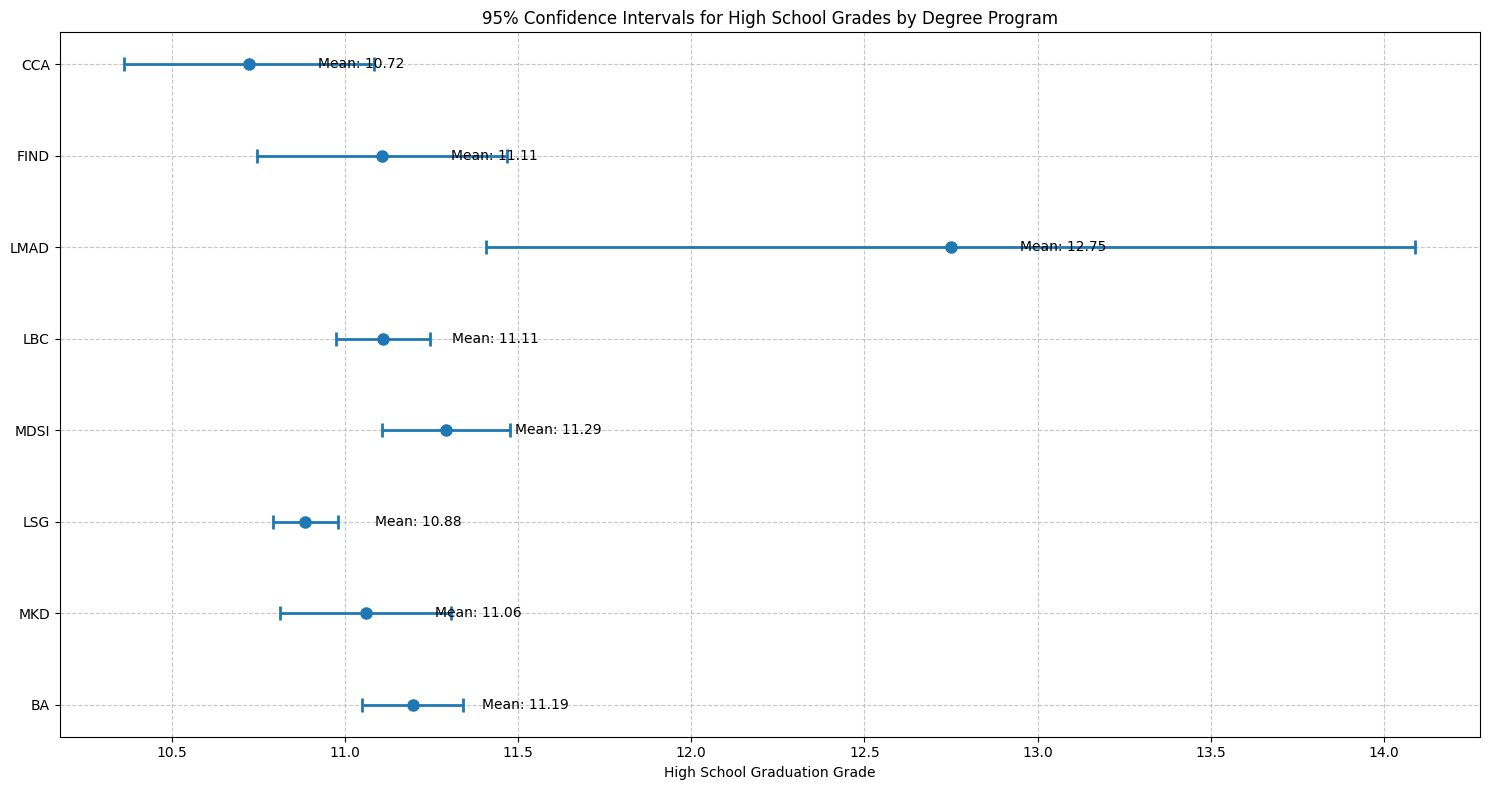

In [ ]:
# Calculate confidence intervals for high school grades by degree
import scipy.stats as stats
import numpy as np

plt.figure(figsize=(15, 8))

# Calculate means and confidence intervals for each degree
confidence_intervals = []
means = []
degrees_list = student_df['Degree'].unique()

for degree in degrees_list:
    data = student_df[student_df['Degree'] == degree]['Highschool graduation grade']
    mean = data.mean()
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))
    confidence_intervals.append(ci)
    means.append(mean)

# Create the visualization
y_pos = np.arange(len(degrees_list))
means = np.array(means)
errors = np.array([(mean - ci[0], ci[1] - mean) for mean, ci in zip(means, confidence_intervals)]).T

plt.errorbar(means, y_pos, xerr=errors, fmt='o', capsize=5, capthick=2, elinewidth=2, markersize=8)
plt.yticks(y_pos, degrees_list)
plt.xlabel('High School Graduation Grade')
plt.title('95% Confidence Intervals for High School Grades by Degree Program')
plt.grid(True, linestyle='--', alpha=0.7)

# Add mean values as annotations
for i, mean in enumerate(means):
    plt.text(mean + 0.2, i, f'Mean: {mean:.2f}', verticalalignment='center')

plt.tight_layout()
plt.show()

C:\Users\malek\AppData\Local\Temp\ipykernel_58180\950663827.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))


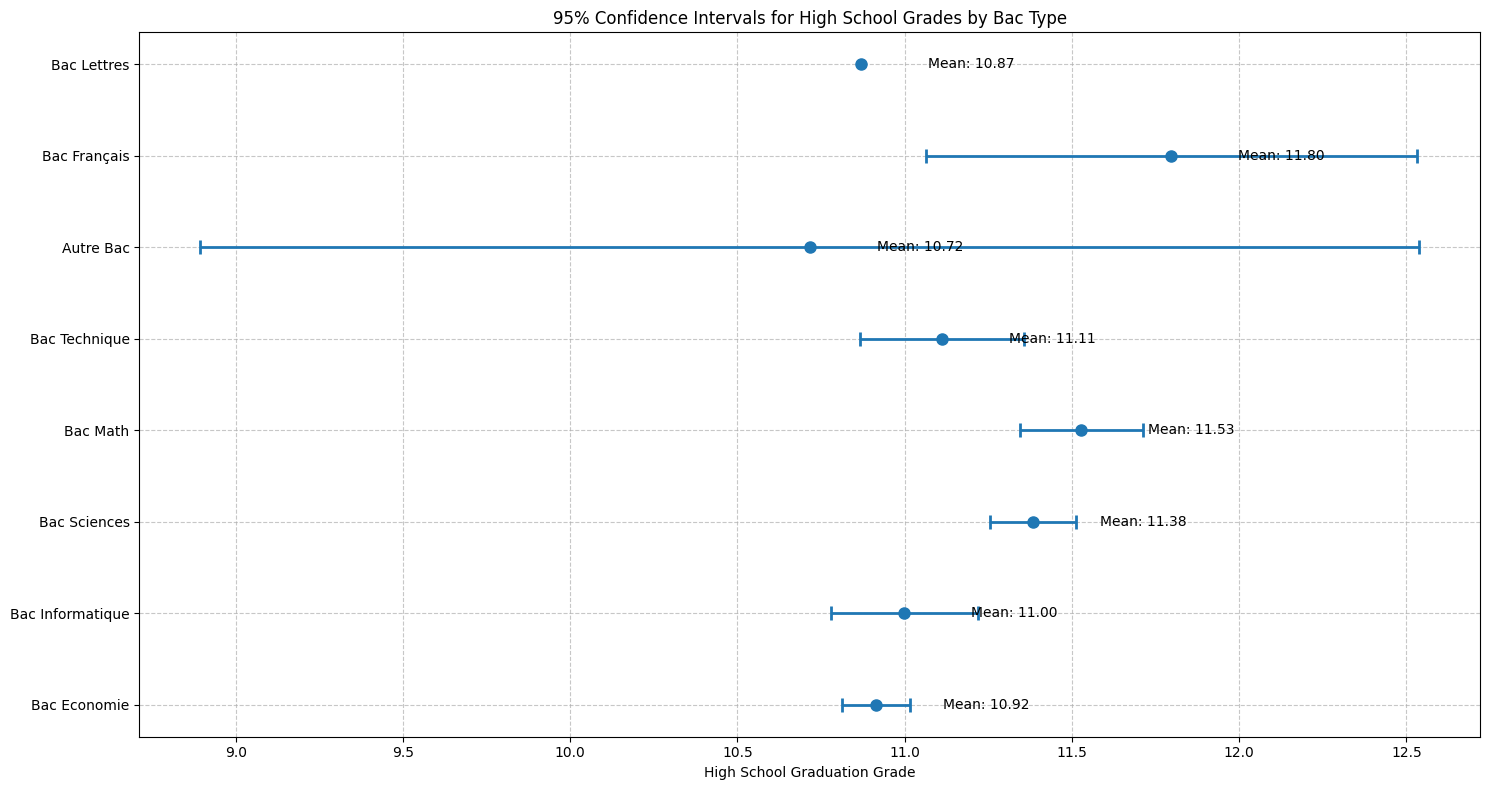

In [ ]:
# Calculate confidence intervals for high school grades by Bac type
plt.figure(figsize=(15, 8))

# Calculate means and confidence intervals for each Bac type
bac_types = student_df['Bac type'].unique()
bac_means = []
bac_cis = []

for bac in bac_types:
    data = student_df[student_df['Bac type'] == bac]['Highschool graduation grade']
    mean = data.mean()
    ci = stats.t.interval(0.95, len(data)-1, loc=mean, scale=stats.sem(data))
    bac_means.append(mean)
    bac_cis.append(ci)

# Create the visualization
y_pos = np.arange(len(bac_types))
bac_means = np.array(bac_means)
errors = np.array([(mean - ci[0], ci[1] - mean) for mean, ci in zip(bac_means, bac_cis)]).T

plt.errorbar(bac_means, y_pos, xerr=errors, fmt='o', capsize=5, capthick=2, elinewidth=2, markersize=8)
plt.yticks(y_pos, bac_types)
plt.xlabel('High School Graduation Grade')
plt.title('95% Confidence Intervals for High School Grades by Bac Type')
plt.grid(True, linestyle='--', alpha=0.7)

# Add mean values as annotations
for i, mean in enumerate(bac_means):
    plt.text(mean + 0.2, i, f'Mean: {mean:.2f}', verticalalignment='center')

plt.tight_layout()
plt.show()

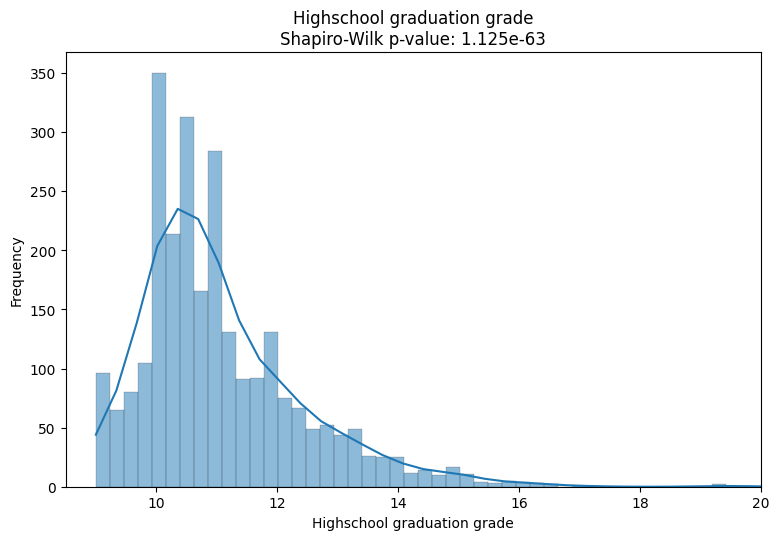

In [ ]:
key_vars = ['Highschool graduation grade']

# 1. Descriptive Statistics for numerical variables
desc_stats = student_df[['Highschool']].describe()

# 2. Calculate skewness and kurtosis
skewness = student_df[['Highschool graduation grade', 'Studies level', 'Class level', 'Degree level']].skew()
kurtosis = student_df[['Highschool graduation grade', 'Studies level', 'Class level', 'Degree level']].kurtosis()

# 3. Create visualization of distribution and statistical tests
plt.figure(figsize=(15, 10))

# Create subplots for each key variable
for idx, var in enumerate(key_vars, 1):
    plt.subplot(2, 2, idx)
    
    # Create histogram with KDE
    sns.histplot(data=student_df[var], kde=True)
    
    # If the variable is 'Highschool graduation grade', limit the x-axis between 8.5 and 20
    if var == 'Highschool graduation grade':
        plt.xlim(8.5, 20)  # Set the x-axis limit for this variable
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(student_df[var])
    
    plt.title(f'{var}\nShapiro-Wilk p-value: {p_value:.3e}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

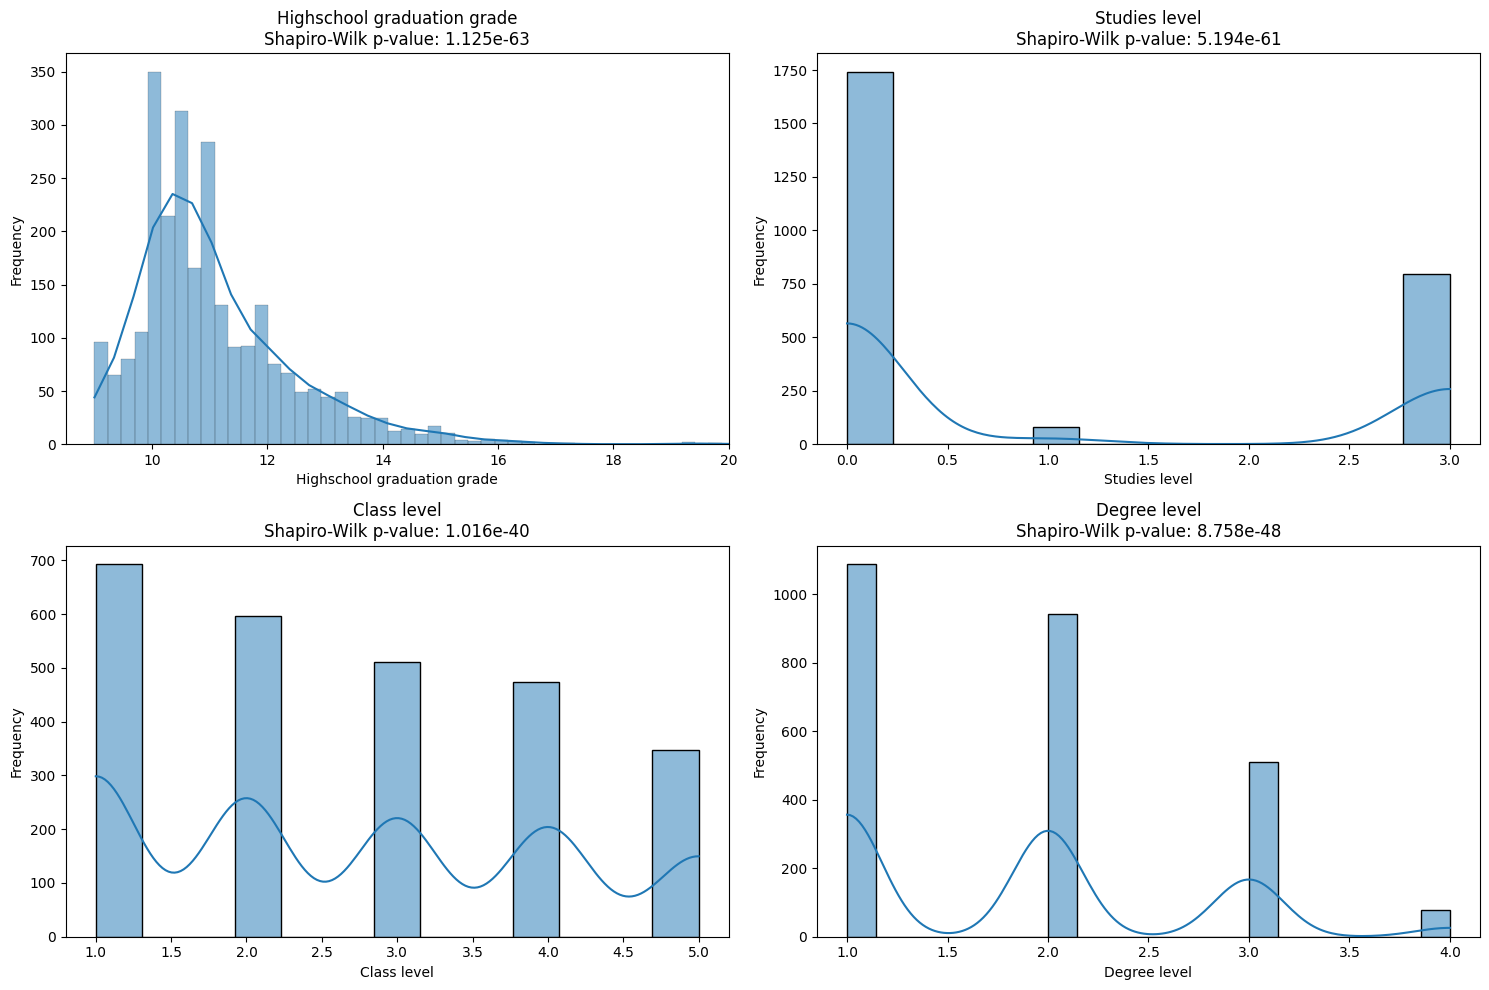


Descriptive Statistics:
--------------------------------------------------
       Highschool graduation grade  Studies level  Class level  Degree level
count                  2621.000000    2621.000000  2621.000000   2621.000000
mean                     11.082472       0.943533     2.688668      1.839756
std                       1.850256       1.370302     1.378122      0.839551
min                       9.000000       0.000000     1.000000      1.000000
25%                      10.110000       0.000000     1.000000      1.000000
50%                      10.740000       0.000000     3.000000      2.000000
75%                      11.710000       3.000000     4.000000      2.000000
max                      76.350000       3.000000     5.000000      4.000000

Skewness:
--------------------------------------------------
Highschool graduation grade    17.272611
Studies level                   0.810817
Class level                     0.267738
Degree level                    0.614862
dtype

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `student_df` is your DataFrame, and key_vars are the columns you're interested in.
key_vars = ['Highschool graduation grade', 'Studies level', 'Class level', 'Degree level']

# 1. Descriptive Statistics for numerical variables
desc_stats = student_df[['Highschool graduation grade', 'Studies level', 'Class level', 'Degree level']].describe()

# 2. Calculate skewness and kurtosis
skewness = student_df[['Highschool graduation grade', 'Studies level', 'Class level', 'Degree level']].skew()
kurtosis = student_df[['Highschool graduation grade', 'Studies level', 'Class level', 'Degree level']].kurtosis()

# 3. Create visualization of distribution and statistical tests
plt.figure(figsize=(15, 10))

# Create subplots for each key variable
for idx, var in enumerate(key_vars, 1):
    plt.subplot(2, 2, idx)
    
    # Create histogram with KDE
    sns.histplot(data=student_df[var], kde=True)
    
    # If the variable is 'Highschool graduation grade', limit the x-axis between 8.5 and 20
    if var == 'Highschool graduation grade':
        plt.xlim(8.5, 20)  # Set the x-axis limit for this variable
    
    # Perform Shapiro-Wilk test
    stat, p_value = stats.shapiro(student_df[var])
    
    plt.title(f'{var}\nShapiro-Wilk p-value: {p_value:.3e}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print statistical summary
print("\nDescriptive Statistics:")
print("-" * 50)
print(desc_stats)

print("\nSkewness:")
print("-" * 50)
print(skewness)

print("\nKurtosis:")
print("-" * 50)
print(kurtosis)
